## **Optuna Hyperparameter Tuning** ##
*{'learning_rate': 0.0009416438293819228, 'dropout_prob': 0.3881486564540837, 'batch_size': 16}*


 **Name of notebook with run** : 4Nov 2024 -PyTorch ds

## **Class imbalance** ##

Class Distribution:
Train: {'Fake': 8879, 'Real': 9462}
Test: {'Fake': 1902, 'Real': 2027}
Validation: {'Fake': 1903, 'Real': 2029}


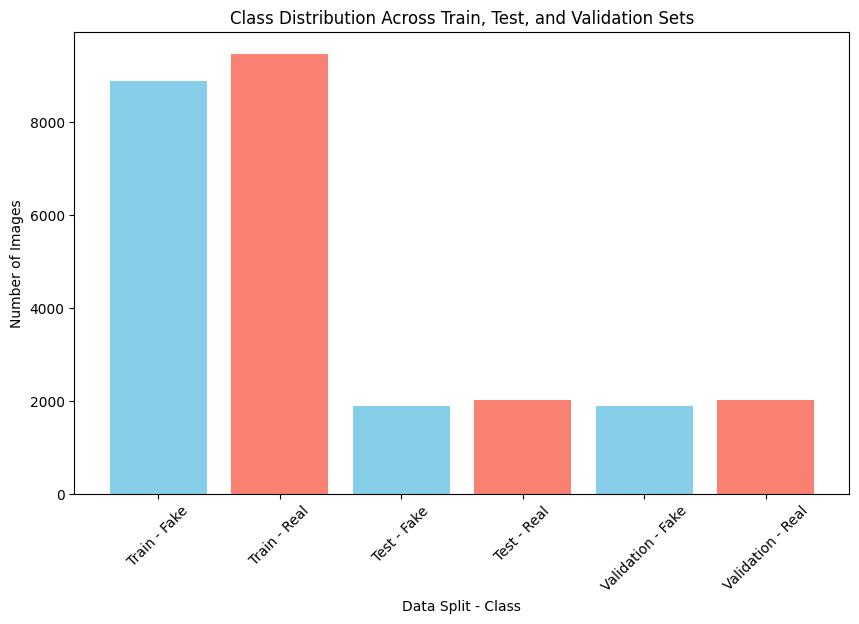

In [22]:
import os
import matplotlib.pyplot as plt

# Define the paths to the folders
base_path = "/kaggle/input/tafahas-spectrograms"
folders = ["Train", "Test", "Validation"]
classes = ["Fake", "Real"]

# Dictionary to store the count of each class in each folder
data_distribution = {folder: {cls: 0 for cls in classes} for folder in folders}

# Count the number of images in each class for each folder
for folder in folders:
    for cls in classes:
        path = os.path.join(base_path, folder, cls)
        data_distribution[folder][cls] = len(os.listdir(path))

# Display the distribution
print("Class Distribution:")
for folder in data_distribution:
    print(f"{folder}: {data_distribution[folder]}")

# Visualization
labels = []
counts = []
for folder in data_distribution:
    for cls in data_distribution[folder]:
        labels.append(f"{folder} - {cls}")
        counts.append(data_distribution[folder][cls])

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['skyblue', 'salmon'] * len(folders))
plt.xlabel("Data Split - Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution Across Train, Test, and Validation Sets")
plt.xticks(rotation=45)
plt.show()


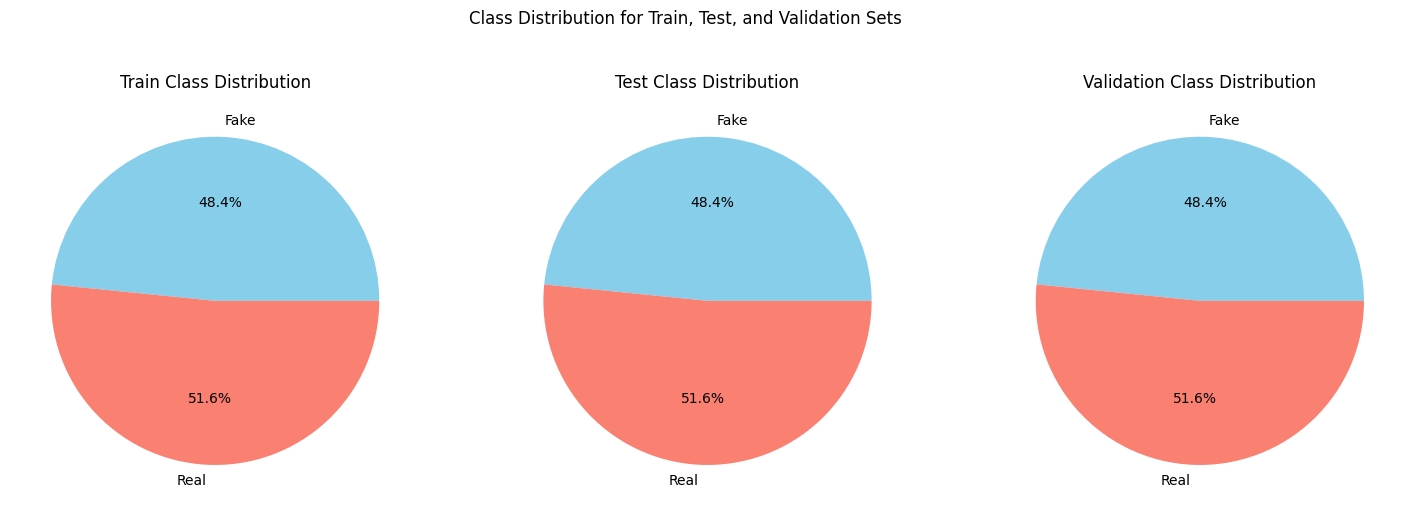

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, folder in enumerate(folders):
    counts = [data_distribution[folder]["Fake"], data_distribution[folder]["Real"]]
    labels = ["Fake", "Real"]
    axes[idx].pie(counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
    axes[idx].set_title(f"{folder} Class Distribution")

plt.suptitle("Class Distribution for Train, Test, and Validation Sets")
plt.show()


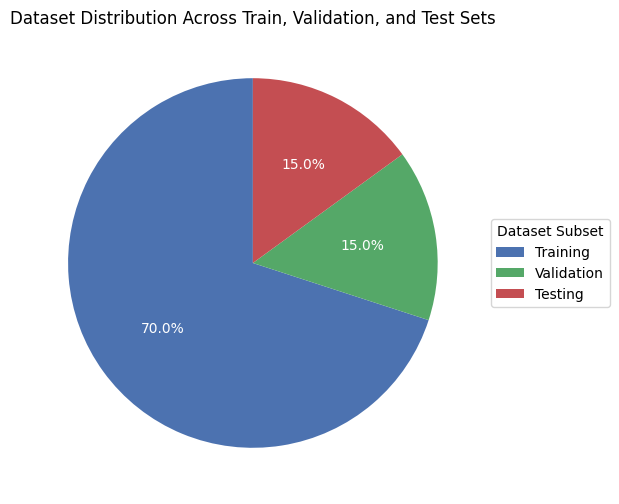

In [31]:
import matplotlib.pyplot as plt

# Define the counts for each subset
train_count = sum(data_distribution["Train"].values())
val_count = sum(data_distribution["Validation"].values())
test_count = sum(data_distribution["Test"].values())

# Define the labels and values
labels = ["Training", "Validation", "Testing"]
sizes = [train_count, val_count, test_count]
colors = ['#4C72B0', '#55A868', '#C44E52']  # Custom colors

# Plot the pie chart without labels on the slices
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%', textprops=dict(color="w"))

# Add a legend next to the pie chart
ax.legend(wedges, labels, title="Dataset Subset", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set title for the pie chart
ax.set_title("Dataset Distribution Across Train, Validation, and Test Sets", fontsize=12)

# Save the chart with a legend beside it to the current directory
plt.savefig("dataset_distribution_with_legend.png", bbox_inches='tight', dpi=150)

plt.show()


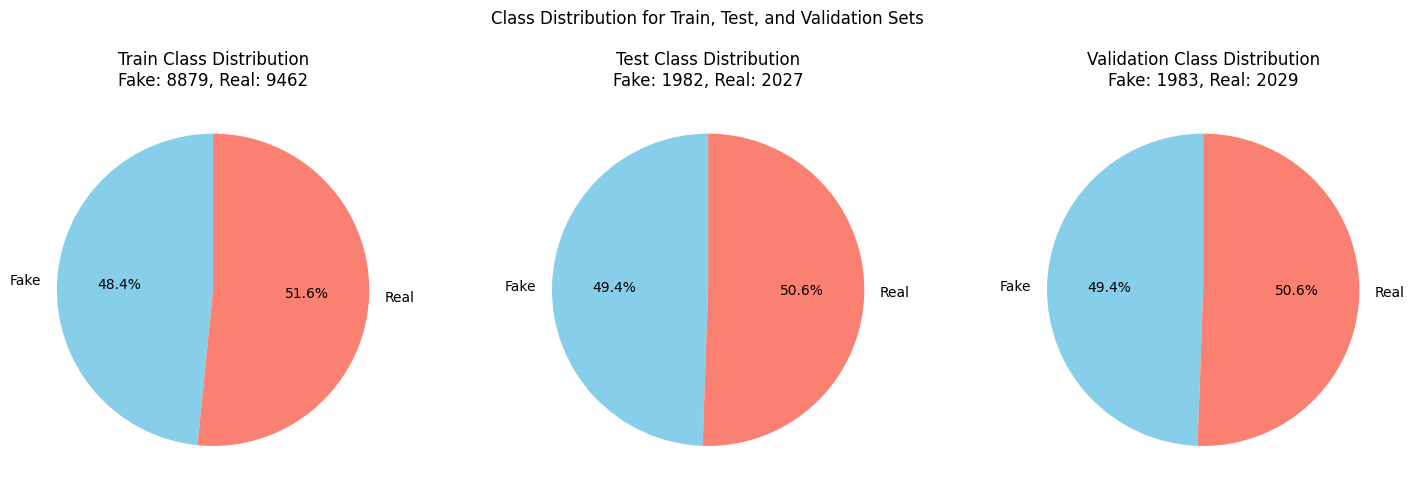

In [38]:
import matplotlib.pyplot as plt

# Data distribution for each subset
data_distribution = {
    "Train": {"Fake": 8879, "Real": 9462},
    "Test": {"Fake": 1982, "Real": 2027},
    "Validation": {"Fake": 1983, "Real": 2029}
}

# Plotting the pie charts for each subset with specific counts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Class Distribution for Train, Test, and Validation Sets")

for idx, (subset, counts) in enumerate(data_distribution.items()):
    labels = ['Fake', 'Real']
    sizes = [counts["Fake"], counts["Real"]]
    colors = ['skyblue', 'salmon']
    title = f"{subset} Class Distribution\nFake: {counts['Fake']}, Real: {counts['Real']}"
    
    axes[idx].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    axes[idx].set_title(title)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()


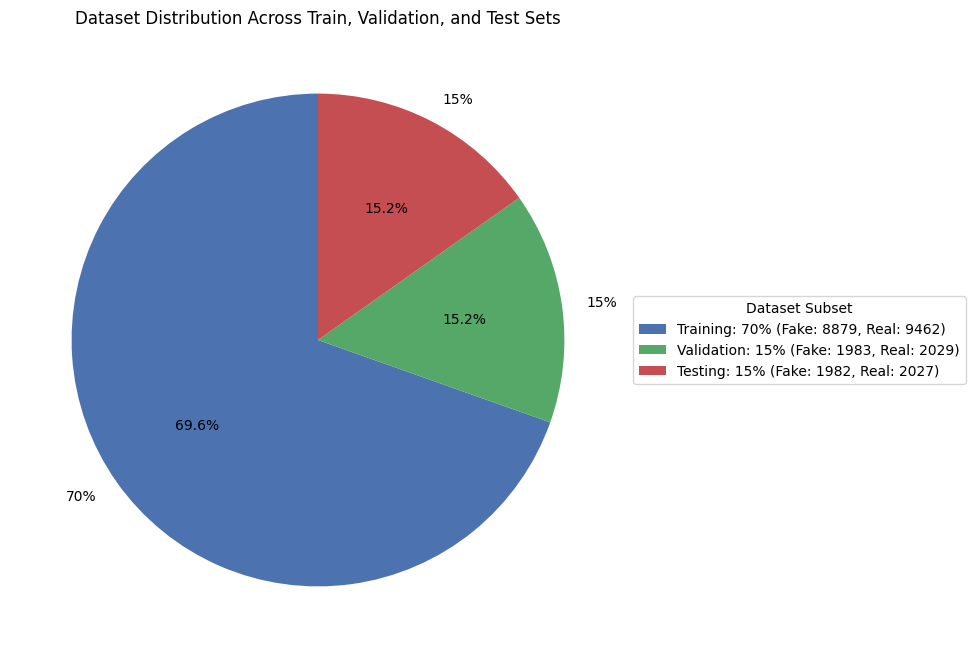

In [39]:
import matplotlib.pyplot as plt

# Define the counts for each subset
train_fake = data_distribution["Train"]["Fake"]
train_real = data_distribution["Train"]["Real"]
val_fake = data_distribution["Validation"]["Fake"]
val_real = data_distribution["Validation"]["Real"]
test_fake = data_distribution["Test"]["Fake"]
test_real = data_distribution["Test"]["Real"]

# Total counts
train_count = train_fake + train_real
val_count = val_fake + val_real
test_count = test_fake + test_real
total_count = train_count + val_count + test_count

# Labels with detailed information for legend
labels = [
    f"Training: 70% (Fake: {train_fake}, Real: {train_real})",
    f"Validation: 15% (Fake: {val_fake}, Real: {val_real})",
    f"Testing: 15% (Fake: {test_fake}, Real: {test_real})"
]
sizes = [train_count, val_count, test_count]
colors = ['#4C72B0', '#55A868', '#C44E52']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=[f"{size / total_count:.0%}" for size in sizes], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Dataset Distribution Across Train, Validation, and Test Sets")

# Create a custom legend with detailed information
plt.legend(labels, title="Dataset Subset", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


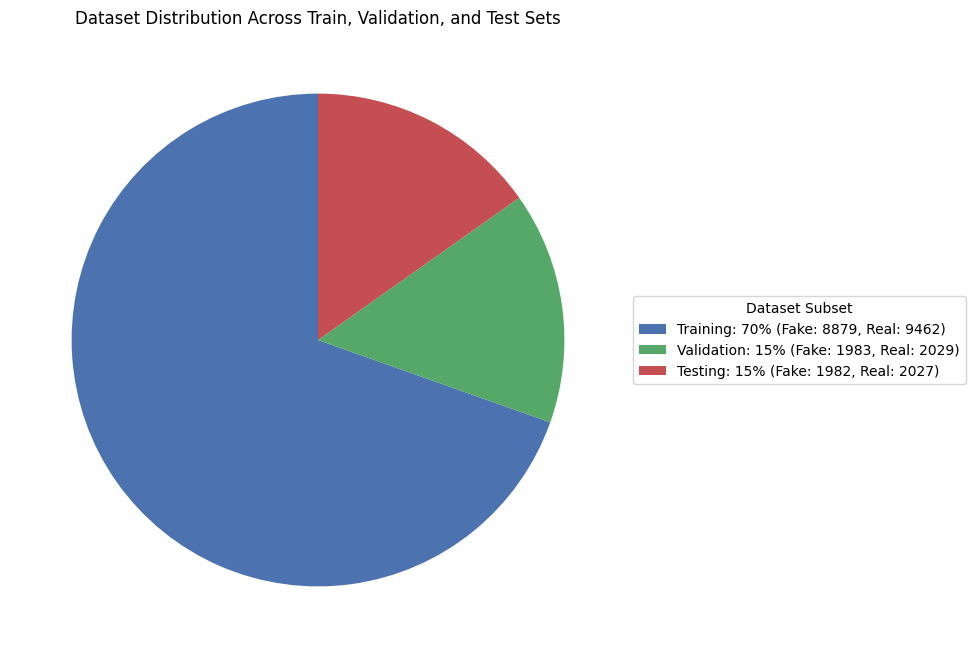

In [40]:
import matplotlib.pyplot as plt

# Define the counts for each subset
train_count = sum(data_distribution["Train"].values())
val_count = sum(data_distribution["Validation"].values())
test_count = sum(data_distribution["Test"].values())

# Define the labels and values
labels = ["Training", "Validation", "Testing"]
sizes = [train_count, val_count, test_count]

# Legend labels with rounded percentages and specific data counts
legend_labels = [
    f"Training: 70% (Fake: {data_distribution['Train']['Fake']}, Real: {data_distribution['Train']['Real']})",
    f"Validation: 15% (Fake: {data_distribution['Validation']['Fake']}, Real: {data_distribution['Validation']['Real']})",
    f"Testing: 15% (Fake: {data_distribution['Test']['Fake']}, Real: {data_distribution['Test']['Real']})"
]

# Plot the pie chart without the internal percentages
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=None, colors=['#4C72B0', '#55A868', '#C44E52'], startangle=90)
plt.title("Dataset Distribution Across Train, Validation, and Test Sets")

# Add the legend
plt.legend(legend_labels, title="Dataset Subset", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


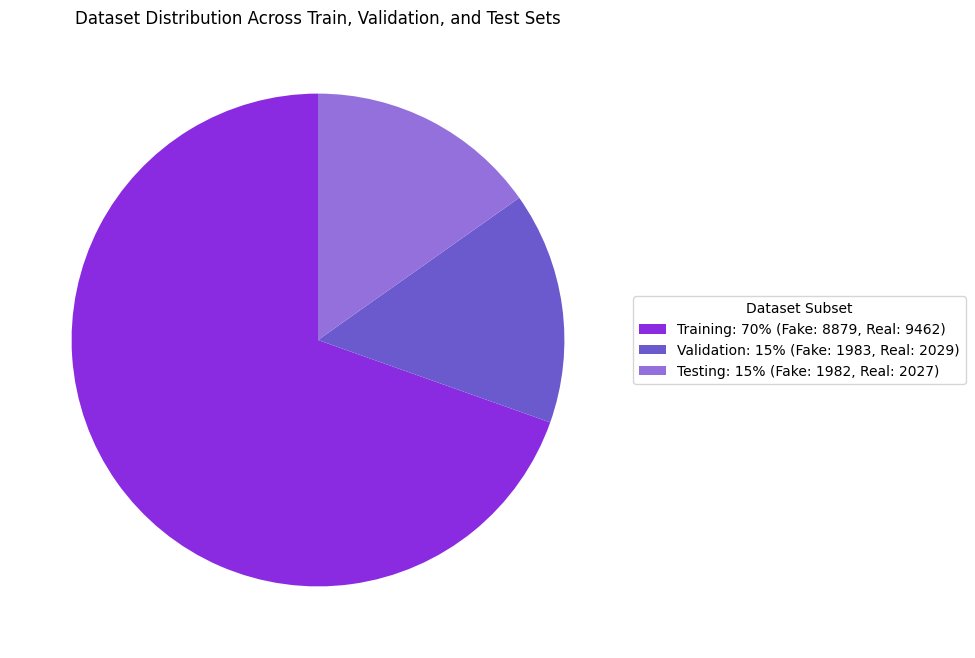

In [42]:
import matplotlib.pyplot as plt

# Define the counts for each subset
train_count = sum(data_distribution["Train"].values())
val_count = sum(data_distribution["Validation"].values())
test_count = sum(data_distribution["Test"].values())

# Define the labels and values
labels = ["Training", "Validation", "Testing"]
sizes = [train_count, val_count, test_count]

# Legend labels with rounded percentages and specific data counts
legend_labels = [
    f"Training: 70% (Fake: {data_distribution['Train']['Fake']}, Real: {data_distribution['Train']['Real']})",
    f"Validation: 15% (Fake: {data_distribution['Validation']['Fake']}, Real: {data_distribution['Validation']['Real']})",
    f"Testing: 15% (Fake: {data_distribution['Test']['Fake']}, Real: {data_distribution['Test']['Real']})"
]

# Updated colors to suit a purple-blue themed poster
theme_colors = ['#8A2BE2', '#6A5ACD', '#9370DB']  # Shades of purple

# Plot the pie chart without the internal percentages
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=None, colors=theme_colors, startangle=90)
plt.title("Dataset Distribution Across Train, Validation, and Test Sets")

# Add the legend
plt.legend(legend_labels, title="Dataset Subset", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


In [ ]:
# Calculate the difference between Fake and Real classes for each data split
class_differences = {folder: {} for folder in data_distribution}

for folder in data_distribution:
    fake_count = data_distribution[folder]["Fake"]
    real_count = data_distribution[folder]["Real"]
    difference = abs(fake_count - real_count)
    percentage_difference = (difference / max(fake_count, real_count)) * 100
    class_differences[folder] = {
        "Fake Count": fake_count,
        "Real Count": real_count,
        "Difference": difference,
        "Percentage Difference (%)": round(percentage_difference, 2)
    }

# Display the differences
import pandas as pd
df = pd.DataFrame(class_differences).T
df.index.name = 'Data Split'
print(df)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/dataset_distribution_small.png'

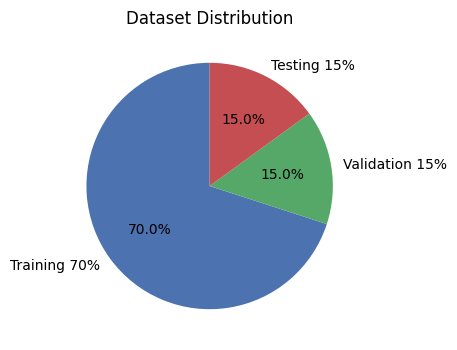

In [28]:
import matplotlib.pyplot as plt

# Define the counts for each subset
train_count = sum(data_distribution["Train"].values())
val_count = sum(data_distribution["Validation"].values())
test_count = sum(data_distribution["Test"].values())

# Define the labels and values
labels = ["Training", "Validation", "Testing"]
sizes = [train_count, val_count, test_count]

# Calculate percentages for labeling
total_count = sum(sizes)
percentages = [f"{label} {size / total_count:.0%}" for label, size in zip(labels, sizes)]

# Plot the pie chart with a smaller size
fig, ax = plt.subplots(figsize=(4, 4))  # Smaller figure size for compact chart
ax.pie(sizes, labels=percentages, autopct='%1.1f%%', colors=['#4C72B0', '#55A868', '#C44E52'], startangle=90)
ax.set_title("Dataset Distribution", fontsize=12)  # Small title for a compact look

# Save as a small .png file to use as a side image in your poster
plt.savefig("/mnt/data/dataset_distribution_small.png", bbox_inches='tight', dpi=150)

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/dataset_distribution_with_legend.png'

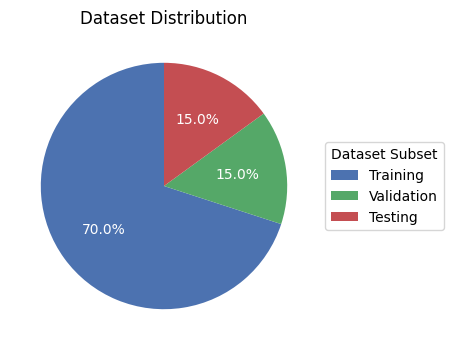

In [29]:
import matplotlib.pyplot as plt

# Define the counts for each subset
train_count = sum(data_distribution["Train"].values())
val_count = sum(data_distribution["Validation"].values())
test_count = sum(data_distribution["Test"].values())

# Define the labels and values
labels = ["Training", "Validation", "Testing"]
sizes = [train_count, val_count, test_count]
colors = ['#4C72B0', '#55A868', '#C44E52']  # Custom colors

# Plot the pie chart with a smaller size
fig, ax = plt.subplots(figsize=(4, 4))  # Smaller figure size for compact chart
wedges, texts, autotexts = ax.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%', textprops=dict(color="w"))

# Add legend (key) beside the pie chart
ax.legend(wedges, labels, title="Dataset Subset", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set title for the pie chart
ax.set_title("Dataset Distribution", fontsize=12)

# Save as a small .png file to use as a side image in your poster
plt.savefig("/mnt/data/dataset_distribution_with_legend.png", bbox_inches='tight', dpi=150)

plt.show()


## **While there is a consistent difference of about 6.5% in favor of the Real class across all sets** ##

In [ ]:
# Import Libraries
import logging
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import albumentations as A
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import random
import tensorflow as tf  # For ONNX to .h5 conversion if required

# Set up logging and device
logging.basicConfig(level=logging.INFO)
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
device = "cuda" if torch.cuda.is_available() else "cpu"

# Set random seed for reproducibility
def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

set_seed()

# Data Preprocessing and Augmentation
def get_transforms():
    return A.Compose([
        A.RandomBrightnessContrast(p=0.2),
        A.GaussNoise(var_limit=(10.0, 50.0), p=0.2),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=10, p=0.3),
        A.CoarseDropout(max_holes=1, max_height=20, max_width=100, min_height=10, min_width=20, p=0.3),
        A.CoarseDropout(max_holes=1, max_height=100, max_width=20, min_height=20, min_width=10, p=0.3),
        A.ShiftScaleRotate(shift_limit_x=0.1, shift_limit_y=0, scale_limit=0, rotate_limit=0, p=0.3)
    ])

def augment_image(image):
    augmented = get_transforms()(image=image)["image"]
    return torch.tensor(augmented / 255.0).float().permute(2, 0, 1)

# DataLoader Setup
def load_data(train_dir, test_dir, val_dir, batch_size):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.Lambda(lambda img: augment_image(np.array(img)))
    ])
    
    train_data = datasets.ImageFolder(train_dir, transform=transform)
    test_data = datasets.ImageFolder(test_dir, transform=transform)
    val_data = datasets.ImageFolder(val_dir, transform=transform)
    
    print("Class to index mapping:", train_data.class_to_idx)
    assert train_data.class_to_idx == {'Fake': 0, 'Real': 1}, "Class labels must be FAKE: 0 and REAL: 1"
    
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
    
    return train_loader, test_loader, val_loader, train_data.class_to_idx

# Calculate Class Weights
def calculate_class_weights(train_dir):
    fake_count = len(os.listdir(os.path.join(train_dir, 'Fake')))
    real_count = len(os.listdir(os.path.join(train_dir, 'Real')))
    class_labels = np.array([0, 1])  # Convert to numpy array
    y = [0] * fake_count + [1] * real_count
    class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=y)
    return torch.tensor(class_weights, dtype=torch.float32).to(device)

# Model Architecture
class SpectrogramCNN(nn.Module):
    def __init__(self, in_channels, num_classes, dropout_prob=0.5):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=4, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 24, kernel_size=5, stride=1, padding=1)
        self.conv3 = nn.Conv2d(24, 32, kernel_size=4, stride=1, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(2, 4), stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc1 = nn.Linear(self._get_conv_output((in_channels, 224, 224)), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            x = torch.zeros(1, *shape)
            x = self.pool(nn.functional.relu(self.conv1(x)))
            x = self.pool(nn.functional.relu(self.conv2(x)))
            x = self.pool(nn.functional.relu(self.conv3(x)))
            x = self.pool(nn.functional.relu(self.conv4(x)))
            return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Training function
def calculate_accuracy(outputs, labels): 
    preds = torch.round(torch.sigmoid(outputs))
    correct = (preds == labels).sum().item()
    return correct / labels.size(0)

def train(train_loader, val_loader, model, class_weights, epochs=15, learning_rate=0.0009416438293819228, patience=5, save_path="allData-pth--224 RGB.pth"):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])

    best_val_loss = float("inf")
    patience_counter = 0
    best_epoch = 0
    
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    for epoch in range(epochs):
        model.train()
        train_loss, train_acc = 0.0, 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.float().to(device).unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_acc += calculate_accuracy(outputs, labels)

        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(train_acc / len(train_loader))

        val_loss, val_acc = 0.0, 0.0
        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.float().to(device).unsqueeze(1)
                outputs = model(images)
                val_loss += criterion(outputs, labels).item()
                val_acc += calculate_accuracy(outputs, labels)

        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(val_acc / len(val_loader))

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            best_epoch = epoch
            torch.save(model, save_path)  # Save the entire model
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.axvline(x=best_epoch, color="r", linestyle="--", label=f"Best Epoch: {best_epoch+1}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Training Accuracy")
    plt.plot(val_accuracies, label="Validation Accuracy")
    plt.axvline(x=best_epoch, color="r", linestyle="--", label=f"Best Epoch: {best_epoch+1}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main Function
def main():
    learning_rate = 0.0009416438293819228
    dropout_prob = 0.3881486564540837
    batch_size = 16

    train_loader, test_loader, val_loader, class_to_idx = load_data(
        '/kaggle/input/tafahas-spectrograms/Train', 
        '/kaggle/input/tafahas-spectrograms/Test', 
        '/kaggle/input/tafahas-spectrograms/Validation', 
        batch_size
    )

    # Calculate class weights
    class_weights = calculate_class_weights('/kaggle/input/tafahas-spectrograms/Train')

    model = SpectrogramCNN(in_channels=3, num_classes=1, dropout_prob=dropout_prob).to(device)
    train(train_loader, val_loader, model, class_weights=class_weights, epochs=15, patience=5, save_path="allData-pth--224 RGB.pth")

    # Load the entire model for evaluation
    if os.path.exists("allData-pth--224 RGB.pth"):
        model = torch.load("allData-pth--224 RGB.pth")  # Directly loads the entire model
        model.to(device)
        print("Model loaded successfully from 'allData-pth--224 RGB.pth'")
    else:
        print("Model file 'allData-pth--224 RGB.pth' does not exist. Ensure training completed successfully.")

if __name__ == "__main__":
    main()


In [24]:
# Evaluation function to calculate test accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate(model, test_loader):
    model.eval()
    test_acc = 0.0
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.round(torch.sigmoid(outputs))
            
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            
            test_acc += (preds == labels.unsqueeze(1)).sum().item()
    
    test_accuracy = test_acc / len(test_loader.dataset)
    print(f"Test Accuracy: {test_accuracy:.2f}")

    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# Main function to load the model and evaluate without training
def main():
    batch_size = 16
    
    # Load data
    _, test_loader, _, _ = load_data(
        '/kaggle/input/tafahas-spectrograms/Train', 
        '/kaggle/input/tafahas-spectrograms/Test', 
        '/kaggle/input/tafahas-spectrograms/Validation', 
        batch_size
    )

    # Load the model for evaluation
    if os.path.exists("allData-pth--224 RGB.pth"):
        model = torch.load("allData-pth--224 RGB.pth")  # Directly loads the entire model
        model.to(device)
        print("Model loaded successfully from 'allData-pth--224 RGB.pth'")
        
        # Evaluate the model on the test set
        evaluate(model, test_loader)
    else:
        print("Model file 'allData-pth--224 RGB.pth' does not exist. Ensure training completed successfully.")

if __name__ == "__main__":
    main()


NameError: name 'load_data' is not defined

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Function to plot ROC Curve
def plot_roc_curve(model, test_loader):
    model.eval()
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.sigmoid(outputs).cpu().numpy()  # Convert logits to probabilities
            
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs)

    # Calculate ROC curve and AUC score
    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    auc_score = roc_auc_score(all_labels, all_probs)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f"ROC curve (area = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random chance
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

# Main function to load the model and evaluate without training
def main():
    batch_size = 16
    
    # Load data
    _, test_loader, _, _ = load_data(
        '/kaggle/input/tafahas-spectrograms/Train', 
        '/kaggle/input/tafahas-spectrograms/Test', 
        '/kaggle/input/tafahas-spectrograms/Validation', 
        batch_size
    )

    # Load the model for evaluation
    if os.path.exists("allData-pth--224 RGB.pth"):
        model = torch.load("allData-pth--224 RGB.pth")  # Directly loads the entire model
        model.to(device)
        print("Model loaded successfully from 'allData-pth--224 RGB.pth'")
        
        # Evaluate the model on the test set
        evaluate(model, test_loader)
        
        # Plot the ROC curve
        plot_roc_curve(model, test_loader)
    else:
        print("Model file 'allData-pth--224 RGB.pth' does not exist. Ensure training completed successfully.")

if __name__ == "__main__":
    main()


NameError: name 'load_data' is not defined

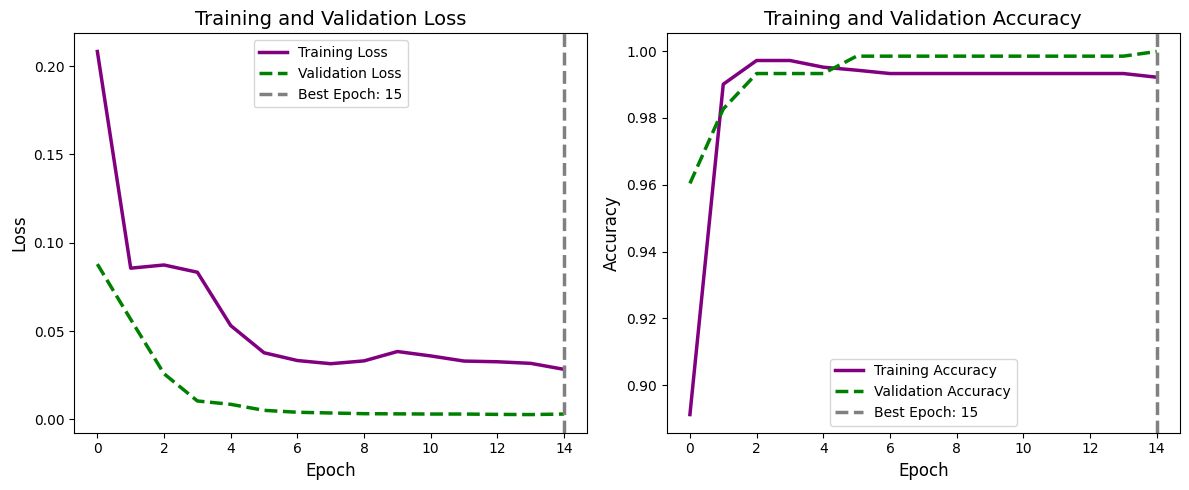

In [22]:
# Filled data from the screenshot
train_losses = [0.2083, 0.0856, 0.0874, 0.0833, 0.0531, 0.0377, 0.0333, 0.0315, 0.0331, 0.0384, 0.0359, 0.0330, 0.0326, 0.0317, 0.0283]
val_losses = [0.0879, 0.0566, 0.0258, 0.0104, 0.0085, 0.0051, 0.0040, 0.0036, 0.0032, 0.0031, 0.0030, 0.0030, 0.0028, 0.0027, 0.0030]
train_accuracies = [0.8912, 0.9901, 0.9972, 0.9972, 0.9952, 0.9943, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9922]
val_accuracies = [0.9604, 0.9827, 0.9933, 0.9933, 0.9933, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9999]
best_epoch = 14

# Visualization code
import matplotlib.pyplot as plt

# Set a white background for both figure and axes
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

plt.figure(figsize=(12, 5))

# Training and Validation Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss", color="purple", linewidth=2.5)
plt.plot(val_losses, label="Validation Loss", color="green", linestyle="--", linewidth=2.5)
plt.axvline(x=best_epoch, color="gray", linestyle="--", linewidth=2.5, label=f"Best Epoch: {best_epoch+1}")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss", fontsize=14)  # Removed bold
plt.legend(fontsize=10)

# Training and Validation Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy", color="purple", linewidth=2.5)
plt.plot(val_accuracies, label="Validation Accuracy", color="green", linestyle="--", linewidth=2.5)
plt.axvline(x=best_epoch, color="gray", linestyle="--", linewidth=2.5, label=f"Best Epoch: {best_epoch+1}")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=14)  # Removed bold
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


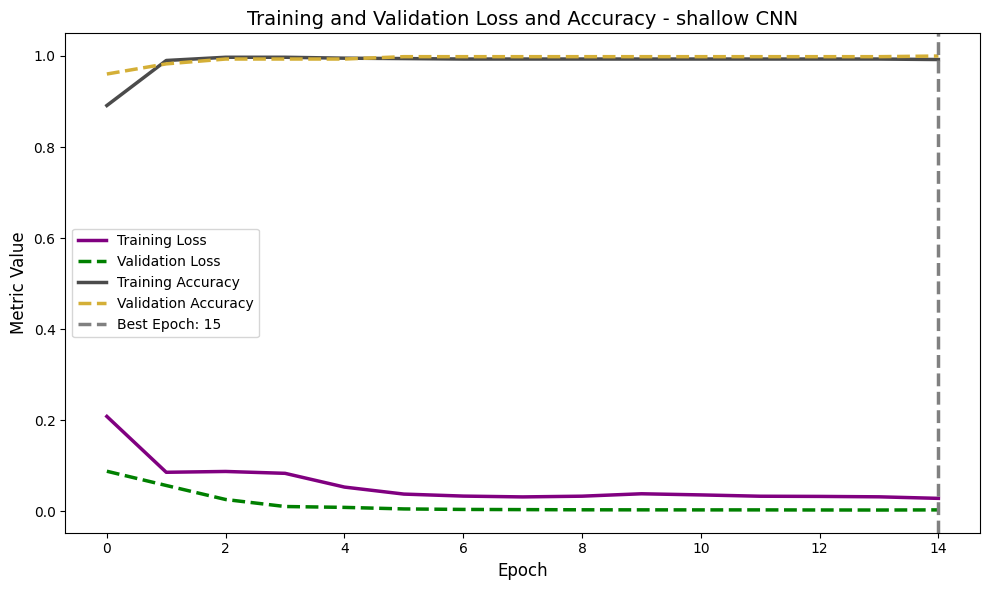

In [27]:
# Filled data from the screenshot
train_losses = [0.2083, 0.0856, 0.0874, 0.0833, 0.0531, 0.0377, 0.0333, 0.0315, 0.0331, 0.0384, 0.0359, 0.0330, 0.0326, 0.0317, 0.0283]
val_losses = [0.0879, 0.0566, 0.0258, 0.0104, 0.0085, 0.0051, 0.0040, 0.0036, 0.0032, 0.0031, 0.0030, 0.0030, 0.0028, 0.0027, 0.0030]
train_accuracies = [0.8912, 0.9901, 0.9972, 0.9972, 0.9952, 0.9943, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9922]
val_accuracies = [0.9604, 0.9827, 0.9933, 0.9933, 0.9933, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9999]
best_epoch = 14

# Visualization code
import matplotlib.pyplot as plt

# Set a white background for both figure and axes
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

plt.figure(figsize=(10, 6))

# Plot Training and Validation Loss
plt.plot(train_losses, label="Training Loss", color="purple", linewidth=2.5)
plt.plot(val_losses, label="Validation Loss", color="green", linestyle="--", linewidth=2.5)
"""
# Plot Training and Validation Accuracy
plt.plot(train_accuracies, label="Training Accuracy", color="Deep Gray", linewidth=2.5)
plt.plot(val_accuracies, label="Validation Accuracy", color="Muted Gold", linestyle="--", linewidth=2.5)

"""

# Plot Training and Validation Accuracy
plt.plot(train_accuracies, label="Training Accuracy", color="#4B4B4B", linewidth=2.5)  # Deep Gray
plt.plot(val_accuracies, label="Validation Accuracy", color="#D4AF37", linestyle="--", linewidth=2.5)  # Muted Gold


# Mark the Best Epoch
plt.axvline(x=best_epoch, color="gray", linestyle="--", linewidth=2.5, label=f"Best Epoch: {best_epoch+1}")

# Labels and Title
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Metric Value", fontsize=12)
plt.title("Training and Validation Loss and Accuracy - shallow CNN", fontsize=14)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


## **Unseen Sample** ##

**Quran**

In [ ]:
# Import Libraries
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms
from PIL import Image

# Set up device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define the SpectrogramCNN Model Class
class SpectrogramCNN(nn.Module):
    def __init__(self, in_channels, num_classes, dropout_prob=0.5):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=4, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 24, kernel_size=5, stride=1, padding=1)
        self.conv3 = nn.Conv2d(24, 32, kernel_size=4, stride=1, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(2, 4), stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc1 = nn.Linear(self._get_conv_output((in_channels, 224, 224)), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            x = torch.zeros(1, *shape)
            x = self.pool(nn.functional.relu(self.conv1(x)))
            x = self.pool(nn.functional.relu(self.conv2(x)))
            x = self.pool(nn.functional.relu(self.conv3(x)))
            x = self.pool(nn.functional.relu(self.conv4(x)))
            return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Load the Trained Model with weights_only=True to avoid security warnings
model_path = "/kaggle/input/alldata-pth-224-rgb-m/allData-pth--224 RGB.pth"
model = torch.load(model_path, map_location=device)  # Change if you want to use weights_only=True
model.to(device)
model.eval()

# Preprocessing Function for the Input Image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image.to(device)

# Prediction Function
def predict_image(image_path):
    image = preprocess_image(image_path)
    with torch.no_grad():
        output = model(image)
        prob = torch.sigmoid(output).item()
    prediction = "Real" if prob >= 0.5 else "Fake"
    print(f"Predicted Probability of being 'Real': {prob:.4f}")
    print(f"Predicted Class: {prediction}")

# Provide the path to the image
image_path = "/kaggle/input/spectrogram00/spectrogram.png"  # Replace with the actual path
predict_image(image_path)


**FoR real sample**

In [ ]:
# Import Libraries
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms
from PIL import Image

# Set up device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define the SpectrogramCNN Model Class
class SpectrogramCNN(nn.Module):
    def __init__(self, in_channels, num_classes, dropout_prob=0.5):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=4, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 24, kernel_size=5, stride=1, padding=1)
        self.conv3 = nn.Conv2d(24, 32, kernel_size=4, stride=1, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(2, 4), stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc1 = nn.Linear(self._get_conv_output((in_channels, 224, 224)), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            x = torch.zeros(1, *shape)
            x = self.pool(nn.functional.relu(self.conv1(x)))
            x = self.pool(nn.functional.relu(self.conv2(x)))
            x = self.pool(nn.functional.relu(self.conv3(x)))
            x = self.pool(nn.functional.relu(self.conv4(x)))
            return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Load the Trained Model with weights_only=True to avoid security warnings
model_path = "/kaggle/input/alldata-pth-224-rgb-m/allData-pth--224 RGB.pth"
model = torch.load(model_path, map_location=device)  # Change if you want to use weights_only=True
model.to(device)
model.eval()

# Preprocessing Function for the Input Image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image.to(device)

# Prediction Function
def predict_image(image_path):
    image = preprocess_image(image_path)
    with torch.no_grad():
        output = model(image)
        prob = torch.sigmoid(output).item()
    prediction = "Real" if prob >= 0.5 else "Fake"
    print(f"Predicted Probability of being 'Real': {prob:.4f}")
    print(f"Predicted Class: {prediction}")

# Provide the path to the image
image_path = "/kaggle/input/the-fake-or-real-dataset-specto/real/file1073.png"  # Replace with the actual path
predict_image(image_path)


**FoR fake sample**

In [18]:
# Import Libraries
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms
from PIL import Image

# Set up device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define the SpectrogramCNN Model Class
class SpectrogramCNN(nn.Module):
    def __init__(self, in_channels, num_classes, dropout_prob=0.5):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=4, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 24, kernel_size=5, stride=1, padding=1)
        self.conv3 = nn.Conv2d(24, 32, kernel_size=4, stride=1, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(2, 4), stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc1 = nn.Linear(self._get_conv_output((in_channels, 224, 224)), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            x = torch.zeros(1, *shape)
            x = self.pool(nn.functional.relu(self.conv1(x)))
            x = self.pool(nn.functional.relu(self.conv2(x)))
            x = self.pool(nn.functional.relu(self.conv3(x)))
            x = self.pool(nn.functional.relu(self.conv4(x)))
            return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Load the Trained Model with weights_only=True to avoid security warnings
model_path = "/kaggle/input/alldata-pth-224-rgb-m/allData-pth--224 RGB.pth"
model = torch.load(model_path, map_location=device)  # Change if you want to use weights_only=True
model.to(device)
model.eval()

# Preprocessing Function for the Input Image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image.to(device)

# Prediction Function
def predict_image(image_path):
    image = preprocess_image(image_path)
    with torch.no_grad():
        output = model(image)
        prob = torch.sigmoid(output).item()
    prediction = "Real" if prob >= 0.5 else "Fake"
    print(f"Predicted Probability of being 'Real': {prob:.4f}")
    print(f"Predicted Class: {prediction}")

# Provide the path to the image
image_path = "/kaggle/input/the-fake-or-real-dataset-specto/fake/file104.png"  # Replace with the actual path
predict_image(image_path)


Predicted Probability of being 'Real': 0.0356
Predicted Class: Fake


/tmp/ipykernel_30/3991852436.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=device)  # Change if you want to use weights_on

**FoR fake sample**

In [19]:
# Import Libraries
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms
from PIL import Image

# Set up device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define the SpectrogramCNN Model Class
class SpectrogramCNN(nn.Module):
    def __init__(self, in_channels, num_classes, dropout_prob=0.5):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=4, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 24, kernel_size=5, stride=1, padding=1)
        self.conv3 = nn.Conv2d(24, 32, kernel_size=4, stride=1, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(2, 4), stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc1 = nn.Linear(self._get_conv_output((in_channels, 224, 224)), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            x = torch.zeros(1, *shape)
            x = self.pool(nn.functional.relu(self.conv1(x)))
            x = self.pool(nn.functional.relu(self.conv2(x)))
            x = self.pool(nn.functional.relu(self.conv3(x)))
            x = self.pool(nn.functional.relu(self.conv4(x)))
            return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Load the Trained Model with weights_only=True to avoid security warnings
model_path = "/kaggle/input/alldata-pth-224-rgb-m/allData-pth--224 RGB.pth"
model = torch.load(model_path, map_location=device)  # Change if you want to use weights_only=True
model.to(device)
model.eval()

# Preprocessing Function for the Input Image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image.to(device)

# Prediction Function
def predict_image(image_path):
    image = preprocess_image(image_path)
    with torch.no_grad():
        output = model(image)
        prob = torch.sigmoid(output).item()
    prediction = "Real" if prob >= 0.5 else "Fake"
    print(f"Predicted Probability of being 'Real': {prob:.4f}")
    print(f"Predicted Class: {prediction}")

# Provide the path to the image
image_path = "/kaggle/input/the-fake-or-real-dataset-specto/fake/file1244.png"  # Replace with the actual path
predict_image(image_path)


Predicted Probability of being 'Real': 0.0076
Predicted Class: Fake


/tmp/ipykernel_30/2287646655.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=device)  # Change if you want to use weights_on

## **Unseen dataset Overall FoR** ##

Class to index mapping: {'fake': 0, 'real': 1}
Model loaded successfully from 'allData-pth--224 RGB.pth'


/tmp/ipykernel_30/334798639.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)


Unseen Dataset Accuracy: 0.82


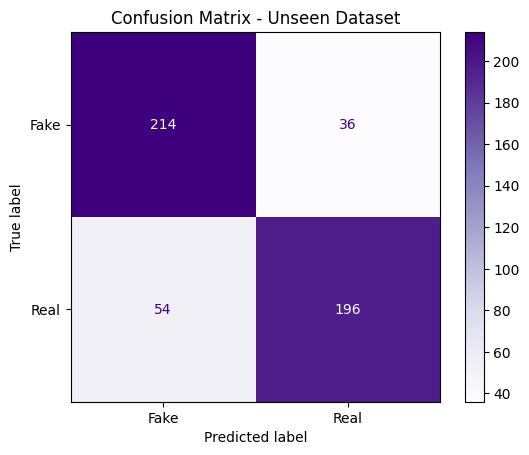

In [14]:
import os
from torchvision import datasets, transforms
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the unseen dataset
def load_unseen_data(unseen_dir, batch_size):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    unseen_data = datasets.ImageFolder(unseen_dir, transform=transform)
    unseen_loader = torch.utils.data.DataLoader(unseen_data, batch_size=batch_size, shuffle=False)
    print("Class to index mapping:", unseen_data.class_to_idx)
    return unseen_loader

# Evaluation function to calculate accuracy and confusion matrix with visualization and saving
def evaluate_on_unseen(model, unseen_loader):
    model.eval()
    unseen_acc = 0.0
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for images, labels in unseen_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.round(torch.sigmoid(outputs))
            
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            
            unseen_acc += (preds == labels.unsqueeze(1)).sum().item()
    
    unseen_accuracy = unseen_acc / len(unseen_loader.dataset)
    print(f"Unseen Dataset Accuracy: {unseen_accuracy:.2f}")

    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
    
    # Change colormap to pastel purple
    disp.plot(cmap="Purples")
    plt.title("Confusion Matrix - Unseen Dataset")
    
    # Save the plot as a .png file
    plt.savefig("confusion_matrix_pastel_purple.png", dpi=300, bbox_inches="tight")
    plt.show()

# Main function to load model and evaluate on unseen dataset
def main():
    unseen_dir = '/kaggle/input/the-fake-or-real-dataset-specto'  # Path to your unseen dataset folder
    batch_size = 16
    
    # Load unseen data
    unseen_loader = load_unseen_data(unseen_dir, batch_size)
    
    # Load the model for evaluation
    model_path = "/kaggle/input/alldata-pth-224-rgb-m/allData-pth--224 RGB.pth"
    if os.path.exists(model_path):
        model = torch.load(model_path)
        model.to(device)
        print("Model loaded successfully from 'allData-pth--224 RGB.pth'")
        
        # Evaluate the model on the unseen dataset
        evaluate_on_unseen(model, unseen_loader)
    else:
        print(f"Model file '{model_path}' does not exist. Ensure training completed successfully.")

if __name__ == "__main__":
    main()


## **Part 1: Misclassification Analysis** ##

Confusion Matrix:
 [[1894    8]
 [  11 2016]]

Classification Report:
               precision    recall  f1-score   support

        Fake       0.99      1.00      1.00      1902
        Real       1.00      0.99      1.00      2027

    accuracy                           1.00      3929
   macro avg       1.00      1.00      1.00      3929
weighted avg       1.00      1.00      1.00      3929



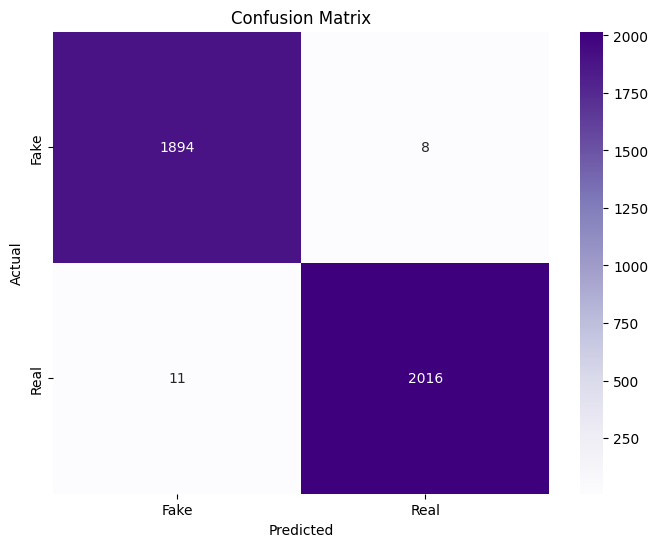

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize and save the confusion matrix as a .png file
def plot_confusion_matrix(cm, class_names, save_path="confusion_matrix.png"):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig(save_path, dpi=300, bbox_inches="tight")  # Save the plot as a .png file
    plt.show()

    # Generate Confusion Matrix and Classification Report with Visualization
def misclassification_analysis_with_plot(model, dataloader, class_names):
    all_preds, all_labels = [], []
    misclassified_samples = []

    model.eval()
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.round(torch.sigmoid(outputs)).squeeze()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # Save misclassified samples
            for img, pred, label in zip(images, preds, labels):
                if pred != label:
                    misclassified_samples.append((img.cpu(), label.item(), pred.item()))

    # Generate Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(all_labels, all_preds, target_names=class_names))
    
    # Plot the confusion matrix
    plot_confusion_matrix(cm, class_names)

    return misclassified_samples

# Perform Misclassification Analysis with Visualization
misclassified_samples = misclassification_analysis_with_plot(model, test_loader, class_names)

In [5]:
import numpy as np
import os
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix, classification_report
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define the SpectrogramCNN model architecture
class SpectrogramCNN(nn.Module):
    def __init__(self, in_channels, num_classes, dropout_prob=0.5):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=4, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 24, kernel_size=5, stride=1, padding=1)
        self.conv3 = nn.Conv2d(24, 32, kernel_size=4, stride=1, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(2, 4), stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc1 = nn.Linear(self._get_conv_output((in_channels, 224, 224)), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            x = torch.zeros(1, *shape)
            x = self.pool(nn.functional.relu(self.conv1(x)))
            x = self.pool(nn.functional.relu(self.conv2(x)))
            x = self.pool(nn.functional.relu(self.conv3(x)))
            x = self.pool(nn.functional.relu(self.conv4(x)))
            return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Load the model
model_path = "/kaggle/input/alldata-pth-224-rgb-m/allData-pth--224 RGB.pth"
if os.path.exists(model_path):
    try:
        # Try loading as a full model
        model = torch.load(model_path)
        model.to(device)
        print("Model loaded successfully from 'allData-pth--224 RGB.pth'")
    except TypeError:
        # If the full model load fails, load only the weights
        model = SpectrogramCNN(in_channels=3, num_classes=1, dropout_prob=0.3881486564540837).to(device)
        model.load_state_dict(torch.load(model_path, map_location=device))
        print("Model weights loaded successfully from 'allData-pth--224 RGB.pth'")
else:
    # Initialize a new model if the file does not exist
    model = SpectrogramCNN(in_channels=3, num_classes=1, dropout_prob=0.3881486564540837).to(device)
    print("New model instance created")

# Load test dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
test_dataset = datasets.ImageFolder(root="/kaggle/input/tafahas-spectrograms/Test", transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Function to perform misclassification analysis and calculate accuracy
def misclassification_analysis(model, dataloader, class_names):
    all_preds, all_labels = [], []
    misclassified_samples = []

    model.eval()
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.round(torch.sigmoid(outputs)).squeeze()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # Save misclassified samples
            for img, pred, label in zip(images, preds, labels):
                if pred != label:
                    misclassified_samples.append((img.cpu(), label.item(), pred.item()))

    # Generate Confusion Matrix and Classification Report
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(all_labels, all_preds, target_names=class_names))
    
    # Calculate accuracy
    accuracy = np.mean(np.array(all_preds) == np.array(all_labels)) * 100
    print(f"Test Accuracy: {accuracy:.2f}%")
    
    return misclassified_samples

# Perform Misclassification Analysis
class_names = ['Fake', 'Real']
misclassified_samples = misclassification_analysis(model, test_loader, class_names)


/tmp/ipykernel_30/2354097388.py:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)


Model loaded successfully from 'allData-pth--224 RGB.pth'
Confusion Matrix:
 [[1894    8]
 [  11 2016]]

Classification Report:
               precision    recall  f1-score   support

        Fake       0.99      1.00      1.00      1902
        Real       1.00      0.99      1.00      2027

    accuracy                           1.00      3929
   macro avg       1.00      1.00      1.00      3929
weighted avg       1.00      1.00      1.00      3929

Test Accuracy: 99.52%


## **Part 2: Dominant Feature Identification (Grad-CAM)** ##

True Label: Fake, Predicted: Real


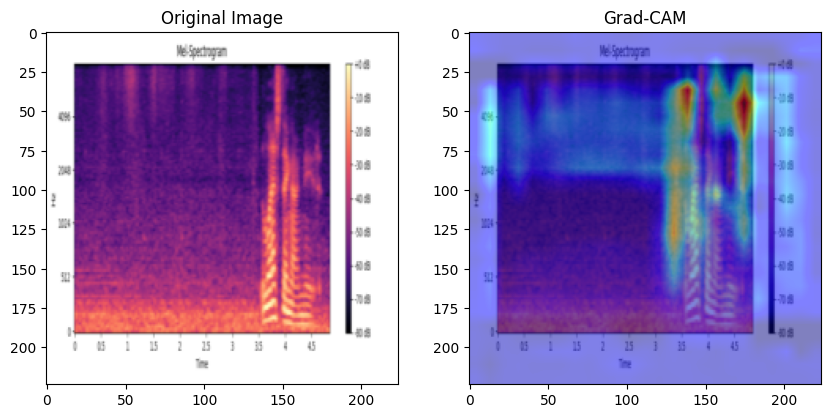

True Label: Fake, Predicted: Real


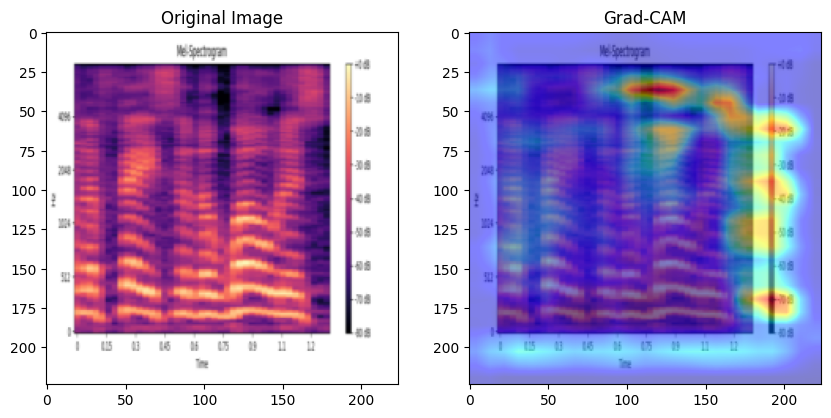

True Label: Fake, Predicted: Real


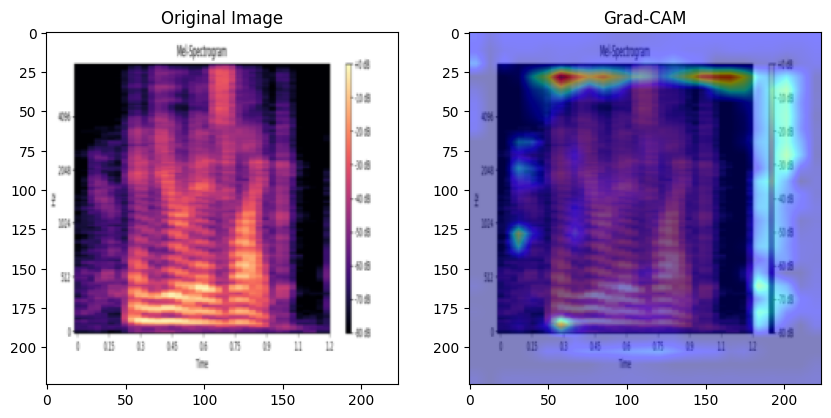

True Label: Fake, Predicted: Real


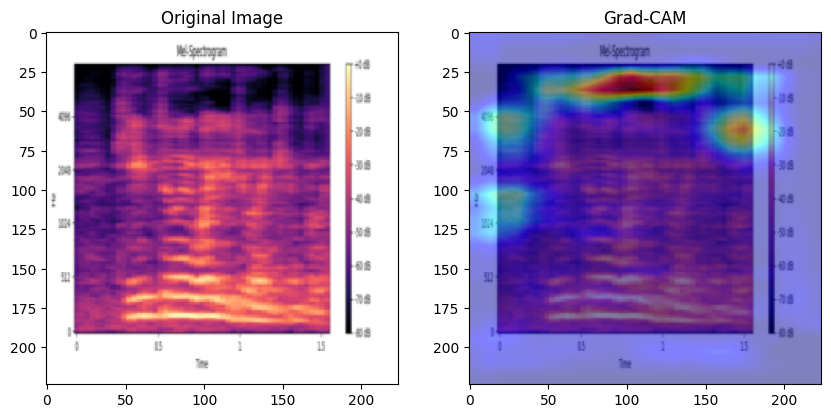

True Label: Fake, Predicted: Real


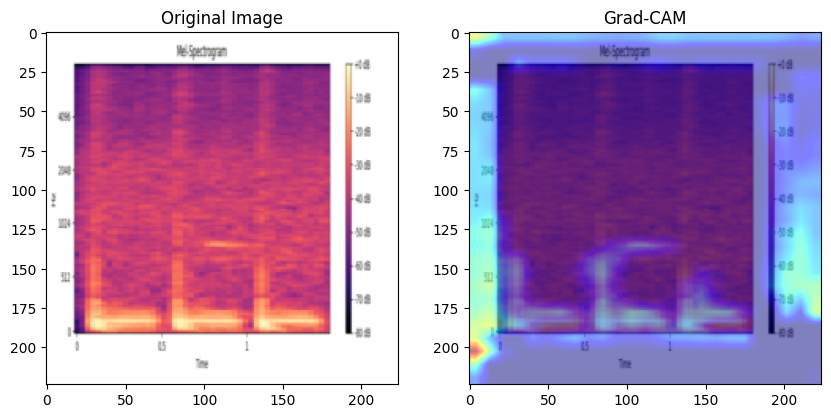

In [33]:
# Install torchcam if not already installed
!pip install torchcam

import matplotlib.pyplot as plt
from torchcam.methods import GradCAM
import torch.nn.functional as F

# Function to visualize Grad-CAM on an image
def apply_grad_cam(model, image, layer_name="conv4"):
    cam_extractor = GradCAM(model, target_layer=model.__getattr__(layer_name))
    scores = model(image.unsqueeze(0).to(device))
    # Since we have a single output, we specify the class index as 0
    activation_map = cam_extractor(0, scores)[0]

    # Remove extra dimensions if present, then add necessary dimensions
    if len(activation_map.shape) == 3:  # If activation_map has three dimensions
        activation_map = activation_map[0]  # Take the first channel
    activation_map = activation_map.unsqueeze(0).unsqueeze(0)  # Ensure shape (1, 1, H, W)

    # Resize activation map to match image dimensions
    activation_map = F.interpolate(
        activation_map,
        size=(image.shape[1], image.shape[2]),  # Resize to match image dimensions (224, 224)
        mode='bilinear',
        align_corners=False
    )
    activation_map = activation_map.squeeze().cpu().numpy()  # Convert to NumPy array for visualization

    # Plot original image and Grad-CAM overlay
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image.squeeze().permute(1, 2, 0).numpy())

    plt.subplot(1, 2, 2)
    plt.title("Grad-CAM")
    plt.imshow(image.squeeze().permute(1, 2, 0).numpy())
    plt.imshow(activation_map, alpha=0.5, cmap='jet')
    plt.show()

# Visualize Grad-CAM for a few misclassified samples
for img, true_label, pred_label in misclassified_samples[:5]:  # Select first 5 misclassified samples
    # Ensure the labels are integers before using them as indices
    true_label = int(true_label)  # Convert to integer
    pred_label = int(pred_label)  # Convert to integer
    print(f"True Label: {class_names[true_label]}, Predicted: {class_names[pred_label]}")
    apply_grad_cam(model, img)


## **Converted Model extension to .pt** ##

In [4]:
import torch
import os

# Step 1: Debug to Verify File Path
dataset_folder = "/kaggle/input/alldata-pth-224-rgb-m/"  
print("Files in dataset folder:", os.listdir(dataset_folder))  # Lists files in the dataset folder

# Update with the correct file name from the debugging output
input_pth_file = "/kaggle/input/alldata-pth-224-rgb-m/allData-pth--224 RGB.pth"  
output_pt_file = "model_converted.pt"  # Output .pt file name

# Step 2: Define Your Model Architecture (SpectrogramCNN already defined in your notebook)
class SpectrogramCNN(torch.nn.Module):
    def __init__(self, in_channels, num_classes, dropout_prob=0.5):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels, 16, kernel_size=4, stride=1, padding=1)
        self.conv2 = torch.nn.Conv2d(16, 24, kernel_size=5, stride=1, padding=1)
        self.conv3 = torch.nn.Conv2d(24, 32, kernel_size=4, stride=1, padding=1)
        self.conv4 = torch.nn.Conv2d(32, 64, kernel_size=(2, 4), stride=1, padding=1)
        self.pool = torch.nn.MaxPool2d(2, 2)
        self.dropout = torch.nn.Dropout(p=dropout_prob)
        self.fc1 = torch.nn.Linear(self._get_conv_output((in_channels, 224, 224)), 128)
        self.fc2 = torch.nn.Linear(128, num_classes)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            x = torch.zeros(1, *shape)
            x = self.pool(torch.nn.functional.relu(self.conv1(x)))
            x = self.pool(torch.nn.functional.relu(self.conv2(x)))
            x = self.pool(torch.nn.functional.relu(self.conv3(x)))
            x = self.pool(torch.nn.functional.relu(self.conv4(x)))
            return x.numel()

    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.pool(torch.nn.functional.relu(self.conv2(x)))
        x = self.pool(torch.nn.functional.relu(self.conv3(x)))
        x = self.pool(torch.nn.functional.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.dropout(torch.nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Step 3: Load the .pth File
model = SpectrogramCNN(in_channels=3, num_classes=1, dropout_prob=0.5)  # Adjust as per your model definition
model.to("cpu")  # Move to CPU for portability

# Load checkpoint
checkpoint = torch.load(input_pth_file, map_location="cpu")  
if isinstance(checkpoint, dict) and "model_state_dict" in checkpoint:
    model.load_state_dict(checkpoint["model_state_dict"])
else:
    model = checkpoint  # If the file contains the entire model

model.eval()  # Set the model to evaluation mode

# Step 4: Convert to TorchScript
scripted_model = torch.jit.script(model)  # Use scripting for models with control flow

# Step 5: Save the Scripted Model as .pt
scripted_model.save(output_pt_file)
print(f"Model has been successfully converted and saved as '{output_pt_file}'")

# Step 6: Provide Download Link for the .pt File
from IPython.display import FileLink
FileLink(output_pt_file)  # Creates a clickable download link


Files in dataset folder: ['allData-pth--224 RGB.pth']
Model has been successfully converted and saved as 'model_converted.pt'


/tmp/ipykernel_30/824510843.py:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(input_pth_file, map_location="cpu")


/kaggle/working/model_converted.pt

In [5]:
# Import Libraries
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms
from PIL import Image

# Set up device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define the SpectrogramCNN Model Class
class SpectrogramCNN(nn.Module):
    def __init__(self, in_channels, num_classes, dropout_prob=0.5):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=4, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 24, kernel_size=5, stride=1, padding=1)
        self.conv3 = nn.Conv2d(24, 32, kernel_size=4, stride=1, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(2, 4), stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc1 = nn.Linear(self._get_conv_output((in_channels, 224, 224)), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            x = torch.zeros(1, *shape)
            x = self.pool(nn.functional.relu(self.conv1(x)))
            x = self.pool(nn.functional.relu(self.conv2(x)))
            x = self.pool(nn.functional.relu(self.conv3(x)))
            x = self.pool(nn.functional.relu(self.conv4(x)))
            return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Load the Trained Model with weights_only=True to avoid security warnings
model_path = "/kaggle/working/model_converted.pt"
model = torch.load(model_path, map_location=device)  # Change if you want to use weights_only=True
model.to(device)
model.eval()

# Preprocessing Function for the Input Image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image.to(device)

# Prediction Function
def predict_image(image_path):
    image = preprocess_image(image_path)
    with torch.no_grad():
        output = model(image)
        prob = torch.sigmoid(output).item()
    prediction = "Real" if prob >= 0.5 else "Fake"
    print(f"Predicted Probability of being 'Real': {prob:.4f}")
    print(f"Predicted Class: {prediction}")

# Provide the path to the image
image_path = "/kaggle/input/the-fake-or-real-dataset-specto/fake/file1244.png"  # Replace with the actual path
predict_image(image_path)


/tmp/ipykernel_30/1701761168.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=device)  # Change if you want to use weights_on

Predicted Probability of being 'Real': 0.0076
Predicted Class: Fake


**for document**

##  **Shallow CNN Demo** ##

## **Optuna Hyperparameter Tuning** ##
*{'learning_rate': 0.0009416438293819228, 'dropout_prob': 0.3881486564540837, 'batch_size': 16}*


 **Name of notebook with run** : 4Nov 2024 -PyTorch ds

## **Class imbalance** ##

Class Distribution:
Train: {'Fake': 8879, 'Real': 9462}
Test: {'Fake': 1902, 'Real': 2027}
Validation: {'Fake': 1903, 'Real': 2029}


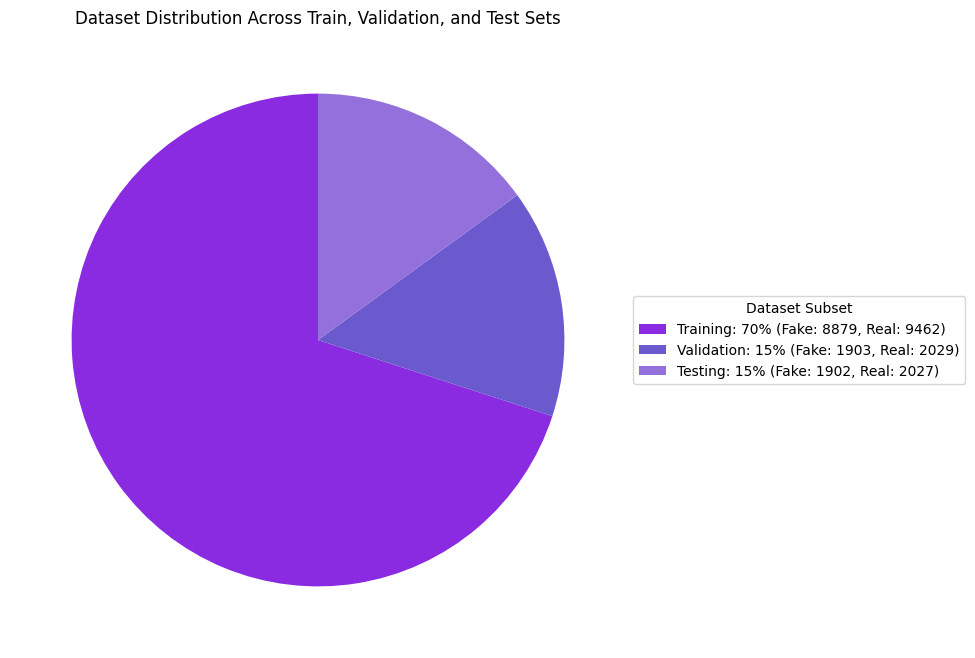

In [32]:
import os
import matplotlib.pyplot as plt

# Step 1: Define the paths to the folders and initialize data_distribution
base_path = "/kaggle/input/tafahas-spectrograms"  # Update this path if necessary
folders = ["Train", "Test", "Validation"]
classes = ["Fake", "Real"]

# Dictionary to store the count of each class in each folder
data_distribution = {folder: {cls: 0 for cls in classes} for folder in folders}

# Count the number of images in each class for each folder
for folder in folders:
    for cls in classes:
        path = os.path.join(base_path, folder, cls)
        data_distribution[folder][cls] = len(os.listdir(path))

# Display the distribution
print("Class Distribution:")
for folder in data_distribution:
    print(f"{folder}: {data_distribution[folder]}")

# Step 2: Define the counts for each subset
train_count = sum(data_distribution["Train"].values())
val_count = sum(data_distribution["Validation"].values())
test_count = sum(data_distribution["Test"].values())

# Step 3: Define the labels and values
labels = ["Training", "Validation", "Testing"]
sizes = [train_count, val_count, test_count]

# Legend labels with rounded percentages and specific data counts
legend_labels = [
    f"Training: 70% (Fake: {data_distribution['Train']['Fake']}, Real: {data_distribution['Train']['Real']})",
    f"Validation: 15% (Fake: {data_distribution['Validation']['Fake']}, Real: {data_distribution['Validation']['Real']})",
    f"Testing: 15% (Fake: {data_distribution['Test']['Fake']}, Real: {data_distribution['Test']['Real']})"
]

# Updated colors to suit a purple-blue themed poster
theme_colors = ['#8A2BE2', '#6A5ACD', '#9370DB']  # Shades of purple

# Step 4: Plot the pie chart without the internal percentages
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=None, colors=theme_colors, startangle=90)
plt.title("Dataset Distribution Across Train, Validation, and Test Sets")

# Add the legend
plt.legend(legend_labels, title="Dataset Subset", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


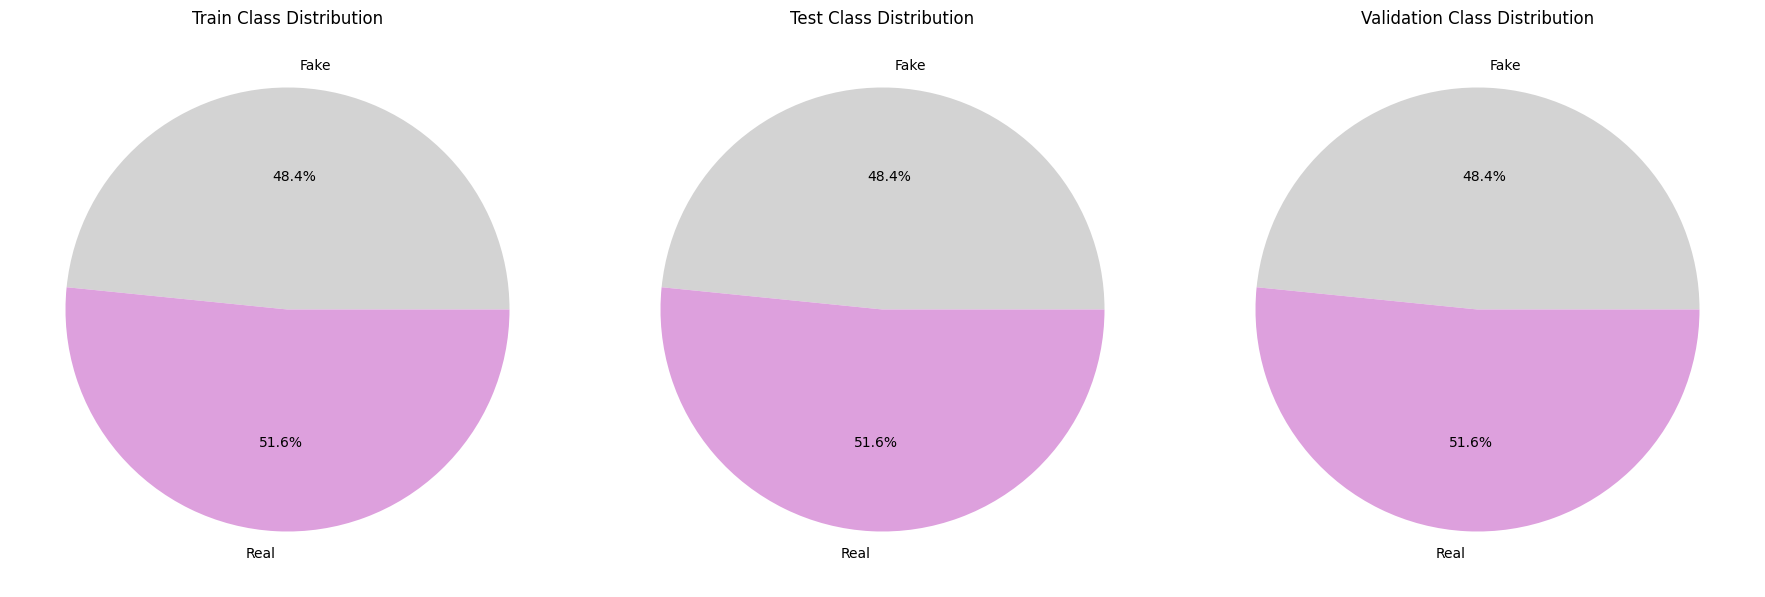

In [38]:
import matplotlib.pyplot as plt
import os

# Dummy data
folders = ["Train", "Test", "Validation"]
data_distribution = {
    "Train": {"Fake": 48.4, "Real": 51.6},
    "Test": {"Fake": 48.4, "Real": 51.6},
    "Validation": {"Fake": 48.4, "Real": 51.6},
}

# Create a figure for the pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Updated colors for the chart (Gray and Pastel Purple)
colors = ['lightgray', 'plum']

for idx, folder in enumerate(folders):
    counts = [data_distribution[folder]["Fake"], data_distribution[folder]["Real"]]
    labels = ["Fake", "Real"]
    axes[idx].pie(counts, labels=labels, autopct='%1.1f%%', colors=colors)
    axes[idx].set_title(f"{folder} Class Distribution")

plt.suptitle("")
plt.tight_layout()

# Save the figure as an image
output_dir = "/mnt/data/"
output_path = os.path.join(output_dir, "class_distribution_pie_chart.png")

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the chart
plt.savefig(output_path)
plt.show()


## **While there is a consistent difference of about 6.5% in favor of the Real class across all sets** ##

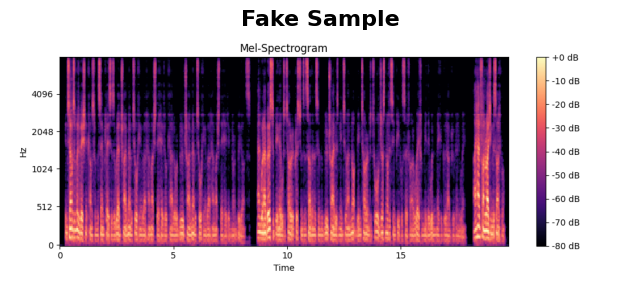

In [4]:
import cv2
import matplotlib.pyplot as plt

# Define the source path of the image in your data
source_path = "/kaggle/input/tafahas-spectrograms/Test/Fake/22155.png"  # Replace with your source image path

# Load the image using OpenCV
image = cv2.imread(source_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display

# Display the image using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title("Fake Sample", fontsize=16, fontweight="bold")
plt.axis("off")  # Hide axes for better visualization
plt.show()


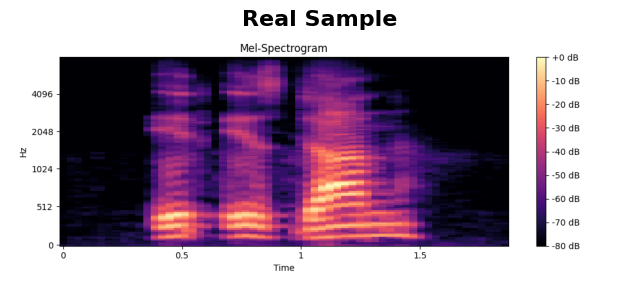

In [5]:
import cv2
import matplotlib.pyplot as plt

# Define the source path of the image in your data
source_path = "/kaggle/input/tafahas-spectrograms/Test/Real/22288.png"  # Replace with your source image path

# Load the image using OpenCV
image = cv2.imread(source_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display

# Display the image using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title("Real Sample", fontsize=16, fontweight="bold")
plt.axis("off")  # Hide axes for better visualization
plt.show()


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


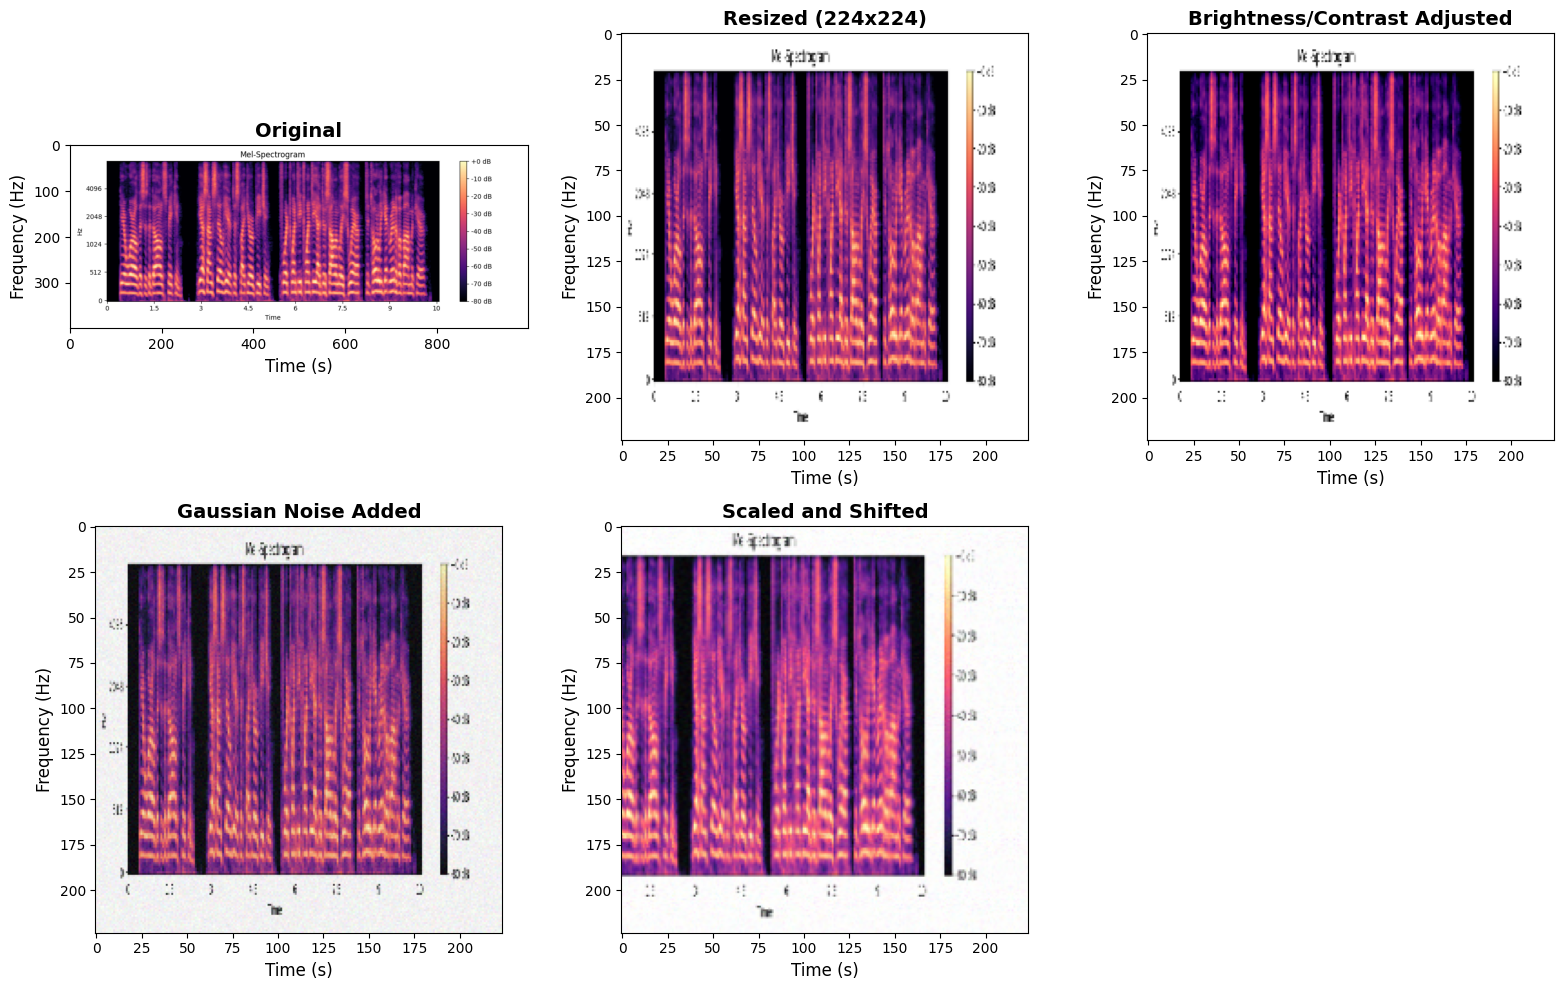

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import albumentations as A

# Define the path to a single spectrogram image
image_path = "/kaggle/input/tafahas-spectrograms/Train/Fake/10002.png"  # Replace with your image path

# Load the original image
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Step-by-step transformations
steps = [
    ("Original", original_image),
    ("Resized (224x224)", A.Resize(224, 224)(image=original_image)["image"]),
    ("Brightness/Contrast Adjusted", A.RandomBrightnessContrast(p=1.0)(image=A.Resize(224, 224)(image=original_image)["image"])["image"]),
    ("Gaussian Noise Added", A.GaussNoise(var_limit=(10.0, 50.0), p=1.0)(image=A.RandomBrightnessContrast(p=1.0)(image=A.Resize(224, 224)(image=original_image)["image"])["image"])["image"]),
    ("Scaled and Shifted", A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=0, p=1.0)(image=A.GaussNoise(var_limit=(10.0, 50.0), p=1.0)(image=A.RandomBrightnessContrast(p=1.0)(image=A.Resize(224, 224)(image=original_image)["image"])["image"])["image"])["image"])
]

# Combine all steps into a single image
plt.figure(figsize=(16, 10))  # Adjust the figure size for clarity

for i, (title, img) in enumerate(steps):
    plt.subplot(2, 3, i + 1)  # Create a subplot grid (2 rows, 3 columns)
    plt.imshow(img)
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel("Time (s)", fontsize=12)
    plt.ylabel("Frequency (Hz)", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

# Adjust layout to fit all subplots
plt.tight_layout()

# Display the combined image
plt.show()


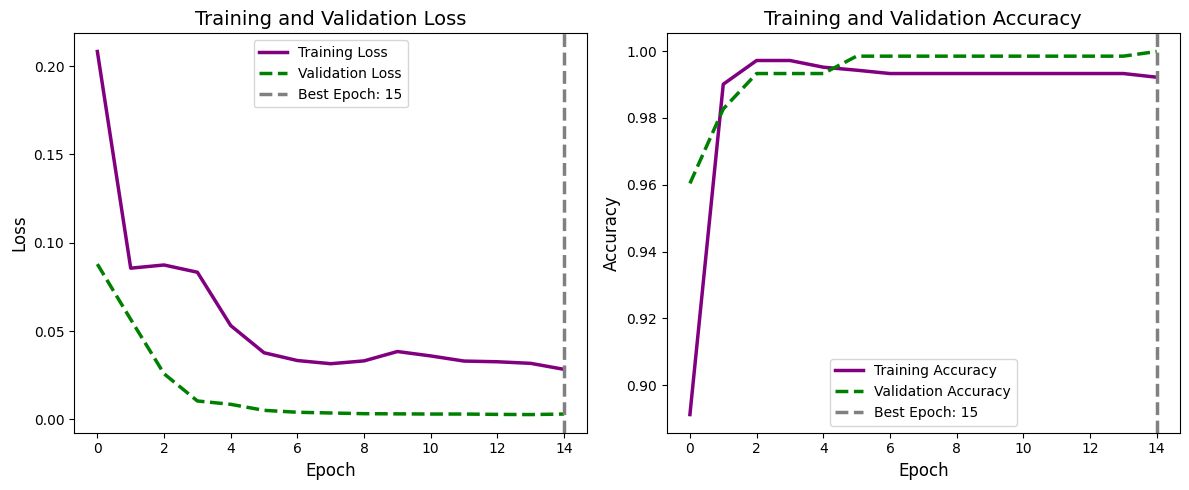

In [18]:
# Filled data from the screenshot
train_losses = [0.2083, 0.0856, 0.0874, 0.0833, 0.0531, 0.0377, 0.0333, 0.0315, 0.0331, 0.0384, 0.0359, 0.0330, 0.0326, 0.0317, 0.0283]
val_losses = [0.0879, 0.0566, 0.0258, 0.0104, 0.0085, 0.0051, 0.0040, 0.0036, 0.0032, 0.0031, 0.0030, 0.0030, 0.0028, 0.0027, 0.0030]
train_accuracies = [0.8912, 0.9901, 0.9972, 0.9972, 0.9952, 0.9943, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9922]
val_accuracies = [0.9604, 0.9827, 0.9933, 0.9933, 0.9933, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9999]
best_epoch = 14

# Visualization code
import matplotlib.pyplot as plt

# Set a white background for both figure and axes
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

plt.figure(figsize=(12, 5))

# Training and Validation Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss", color="purple", linewidth=2.5)
plt.plot(val_losses, label="Validation Loss", color="green", linestyle="--", linewidth=2.5)
plt.axvline(x=best_epoch, color="gray", linestyle="--", linewidth=2.5, label=f"Best Epoch: {best_epoch+1}")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss", fontsize=14)  # Removed bold
plt.legend(fontsize=10)

# Training and Validation Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy", color="purple", linewidth=2.5)
plt.plot(val_accuracies, label="Validation Accuracy", color="green", linestyle="--", linewidth=2.5)
plt.axvline(x=best_epoch, color="gray", linestyle="--", linewidth=2.5, label=f"Best Epoch: {best_epoch+1}")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=14)  # Removed bold
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


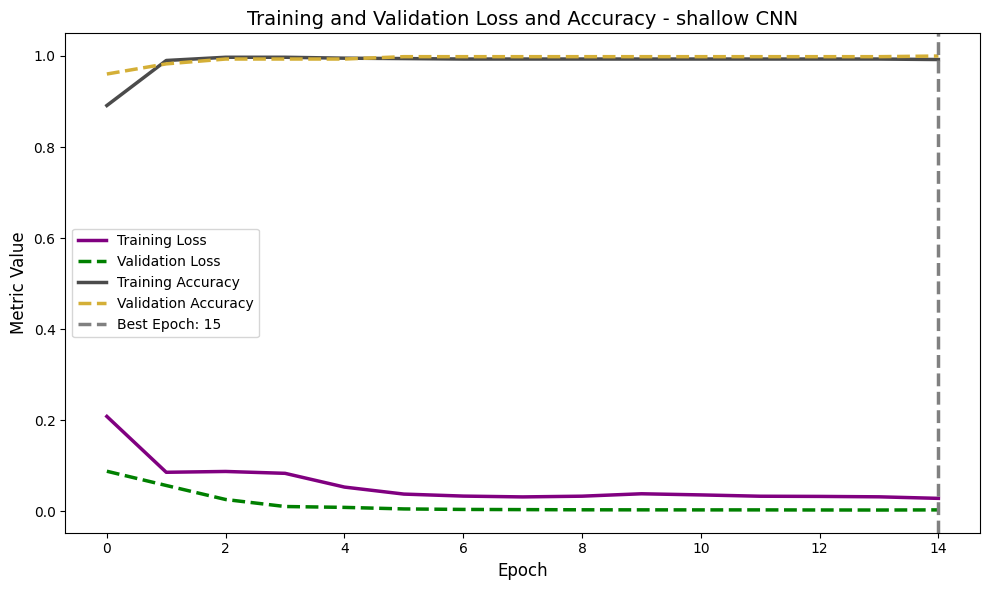

In [22]:
# Filled data from the screenshot
train_losses = [0.2083, 0.0856, 0.0874, 0.0833, 0.0531, 0.0377, 0.0333, 0.0315, 0.0331, 0.0384, 0.0359, 0.0330, 0.0326, 0.0317, 0.0283]
val_losses = [0.0879, 0.0566, 0.0258, 0.0104, 0.0085, 0.0051, 0.0040, 0.0036, 0.0032, 0.0031, 0.0030, 0.0030, 0.0028, 0.0027, 0.0030]
train_accuracies = [0.8912, 0.9901, 0.9972, 0.9972, 0.9952, 0.9943, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9922]
val_accuracies = [0.9604, 0.9827, 0.9933, 0.9933, 0.9933, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9999]
best_epoch = 14

# Visualization code
import matplotlib.pyplot as plt

# Set a white background for both figure and axes
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

plt.figure(figsize=(10, 6))

# Plot Training and Validation Loss
plt.plot(train_losses, label="Training Loss", color="purple", linewidth=2.5)
plt.plot(val_losses, label="Validation Loss", color="green", linestyle="--", linewidth=2.5)
"""
# Plot Training and Validation Accuracy
plt.plot(train_accuracies, label="Training Accuracy", color="Deep Gray", linewidth=2.5)
plt.plot(val_accuracies, label="Validation Accuracy", color="Muted Gold", linestyle="--", linewidth=2.5)

"""

# Plot Training and Validation Accuracy
plt.plot(train_accuracies, label="Training Accuracy", color="#4B4B4B", linewidth=2.5)  # Deep Gray
plt.plot(val_accuracies, label="Validation Accuracy", color="#D4AF37", linestyle="--", linewidth=2.5)  # Muted Gold


# Mark the Best Epoch
plt.axvline(x=best_epoch, color="gray", linestyle="--", linewidth=2.5, label=f"Best Epoch: {best_epoch+1}")

# Labels and Title
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Metric Value", fontsize=12)
plt.title("Training and Validation Loss and Accuracy - shallow CNN", fontsize=14)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


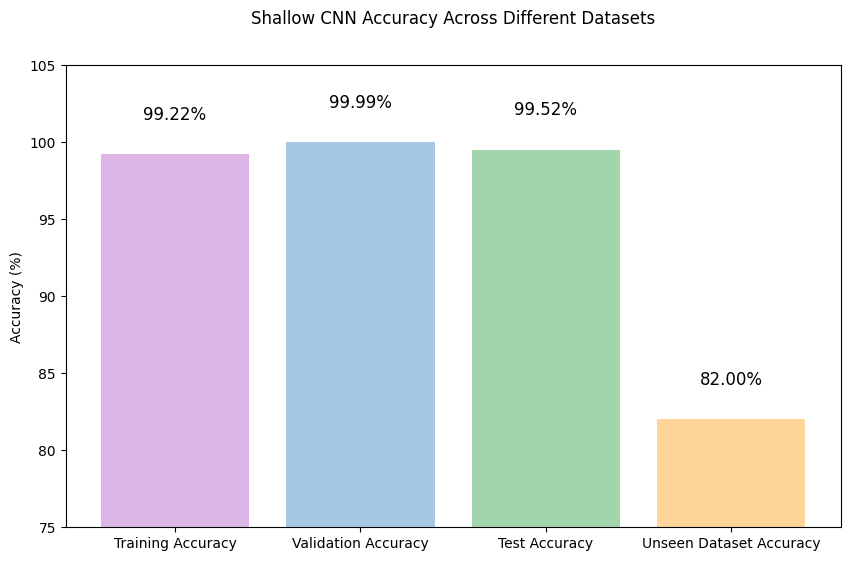

In [19]:
import matplotlib.pyplot as plt

# Define the accuracies for each subset
train_accuracies = [0.8912, 0.9901, 0.9972, 0.9972, 0.9952, 0.9943, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9922]
val_accuracies = [0.9604, 0.9827, 0.9933, 0.9933, 0.9933, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9999]
best_epoch = 14  # Index of the best epoch in the provided data

train_accuracy = train_accuracies[best_epoch] * 100  # Convert to percentage
val_accuracy = val_accuracies[best_epoch] * 100
test_accuracy = 99.52  # Test accuracy you've provided
unseen_accuracy = 82.0  # Unseen dataset accuracy you've provided

# Labels and values for the bar chart
labels = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy', 'Unseen Dataset Accuracy']
accuracies = [train_accuracy, val_accuracy, test_accuracy, unseen_accuracy]

# Plotting the bar chart with pastel colors
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracies, color=['#DAB5E5', '#A7C7E7', '#A2D5AB', '#FFD59A'])  # Pastel colors
plt.ylim(75, 105)  # Slightly increase the y-axis range for more space above bars
plt.ylabel('Accuracy (%)')
plt.title('Shallow CNN Accuracy Across Different Datasets', pad=30)  # Increase padding for title

# Annotating each bar with the exact accuracy value, positioned even higher for readability
for bar, accuracy in zip(bars, accuracies):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        bar.get_height() + 2,               # Y position further above each bar
        f"{accuracy:.2f}%",                 # Text to display
        ha='center', va='bottom', color='black', fontsize=12  # Removed fontweight='bold'
    )

plt.show()


## **Explain Models Parts** ##

## **At begining** ##

In [ ]:
# Set random seed for reproducibility
def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

set_seed()

# Data Preprocessing and Augmentation
def get_transforms():
    return A.Compose([
        A.RandomBrightnessContrast(p=0.2),
        A.GaussNoise(var_limit=(10.0, 50.0), p=0.2),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=10, p=0.3),
        A.CoarseDropout(max_holes=1, max_height=20, max_width=100, min_height=10, min_width=20, p=0.3),
        A.CoarseDropout(max_holes=1, max_height=100, max_width=20, min_height=20, min_width=10, p=0.3),
        A.ShiftScaleRotate(shift_limit_x=0.1, shift_limit_y=0, scale_limit=0, rotate_limit=0, p=0.3)
    ])

def augment_image(image):
    augmented = get_transforms()(image=image)["image"]
    return torch.tensor(augmented / 255.0).float().permute(2, 0, 1)

# DataLoader Setup
def load_data(train_dir, test_dir, val_dir, batch_size):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.Lambda(lambda img: augment_image(np.array(img)))
    ])
    
    train_data = datasets.ImageFolder(train_dir, transform=transform)
    test_data = datasets.ImageFolder(test_dir, transform=transform)
    val_data = datasets.ImageFolder(val_dir, transform=transform)
    
    print("Class to index mapping:", train_data.class_to_idx)
    assert train_data.class_to_idx == {'Fake': 0, 'Real': 1}, "Class labels must be FAKE: 0 and REAL: 1"
    
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
    
    return train_loader, test_loader, val_loader, train_data.class_to_idx


## **Handeling imbalance dataset** ##

In [ ]:
# Calculate Class Weights
def calculate_class_weights(train_dir):
    fake_count = len(os.listdir(os.path.join(train_dir, 'Fake')))
    real_count = len(os.listdir(os.path.join(train_dir, 'Real')))
    class_labels = np.array([0, 1])  # Convert to numpy array
    y = [0] * fake_count + [1] * real_count
    class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=y)
    return torch.tensor(class_weights, dtype=torch.float32).to(device)


## **Model Architecture** ##

In [ ]:
# Model Architecture
class SpectrogramCNN(nn.Module):
    def __init__(self, in_channels, num_classes, dropout_prob=0.5):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=4, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 24, kernel_size=5, stride=1, padding=1)
        self.conv3 = nn.Conv2d(24, 32, kernel_size=4, stride=1, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(2, 4), stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc1 = nn.Linear(self._get_conv_output((in_channels, 224, 224)), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            x = torch.zeros(1, *shape)
            x = self.pool(nn.functional.relu(self.conv1(x)))
            x = self.pool(nn.functional.relu(self.conv2(x)))
            x = self.pool(nn.functional.relu(self.conv3(x)))
            x = self.pool(nn.functional.relu(self.conv4(x)))
            return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [39]:
pip install torch-summary torchviz


Note: you may need to restart the kernel to use updated packages.


In [40]:
import torch
import torch.nn as nn
from torchsummary import summary
from torchviz import make_dot

# Define the SpectrogramCNN Model
class SpectrogramCNN(nn.Module):
    def __init__(self, in_channels, num_classes, dropout_prob=0.5):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=4, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 24, kernel_size=5, stride=1, padding=1)
        self.conv3 = nn.Conv2d(24, 32, kernel_size=4, stride=1, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(2, 4), stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc1 = nn.Linear(self._get_conv_output((in_channels, 224, 224)), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            x = torch.zeros(1, *shape)
            x = self.pool(nn.functional.relu(self.conv1(x)))
            x = self.pool(nn.functional.relu(self.conv2(x)))
            x = self.pool(nn.functional.relu(self.conv3(x)))
            x = self.pool(nn.functional.relu(self.conv4(x)))
            return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Instantiate the model
model = SpectrogramCNN(in_channels=3, num_classes=1, dropout_prob=0.5).to(device)

# Visualize with torchsummary
print("Model Architecture Summary:")
print(summary(model, input_size=(3, 224, 224)))

# Generate dummy input for torchviz visualization
dummy_input = torch.randn(1, 3, 224, 224).to(device)

# Forward pass to create graph
output = model(dummy_input)

# Visualize with torchviz
print("Generating model architecture graph...")
graph = make_dot(output, params=dict(model.named_parameters()))
graph.render("model_architecture", format="png")
print("Graph saved as 'model_architecture.png'")


Model Architecture Summary:
Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            784
├─Conv2d: 1-2                            9,624
├─Conv2d: 1-3                            12,320
├─Conv2d: 1-4                            16,448
├─MaxPool2d: 1-5                         --
├─Dropout: 1-6                           --
├─Linear: 1-7                            1,278,080
├─Linear: 1-8                            129
Total params: 1,317,385
Trainable params: 1,317,385
Non-trainable params: 0
Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            784
├─Conv2d: 1-2                            9,624
├─Conv2d: 1-3                            12,320
├─Conv2d: 1-4                            16,448
├─MaxPool2d: 1-5                         --
├─Dropout: 1-6                           --
├─Linear: 1-7                            1,278,080
├─Linear: 1-8                            129
Total params: 1,317,385
Trainable params: 1,317,385
No

## **Main Function** ##

In [ ]:
# Main Function
def main():
    learning_rate = 0.0009416438293819228
    dropout_prob = 0.3881486564540837
    batch_size = 16

    train_loader, test_loader, val_loader, class_to_idx = load_data(
        '/kaggle/input/tafahas-spectrograms/Train', 
        '/kaggle/input/tafahas-spectrograms/Test', 
        '/kaggle/input/tafahas-spectrograms/Validation', 
        batch_size
    )

    # Calculate class weights
    class_weights = calculate_class_weights('/kaggle/input/tafahas-spectrograms/Train')

    model = SpectrogramCNN(in_channels=3, num_classes=1, dropout_prob=dropout_prob).to(device)
    train(train_loader, val_loader, model, class_weights=class_weights, epochs=15, patience=5, save_path="allData-pth--224 RGB.pth")

    # Load the entire model for evaluation
    if os.path.exists("allData-pth--224 RGB.pth"):
        model = torch.load("allData-pth--224 RGB.pth")  # Directly loads the entire model
        model.to(device)
        print("Model loaded successfully from 'allData-pth--224 RGB.pth'")
    else:
        print("Model file 'allData-pth--224 RGB.pth' does not exist. Ensure training completed successfully.")

if __name__ == "__main__":
    main()


Parameters:

    model.parameters() (weights and biases of layers).
    class_weights (adjusts for imbalanced classes).
    best_val_loss, train_losses, val_losses.
    train_accuracies, val_accuracies.
    Saved model (allData-pth--224 RGB.pth).

Hyperparameters:

    Learning rate: 0.0009416438293819228.
    Dropout probability: 0.3881486564540837.
    Batch size: 16.
    Number of epochs: 15.
    Patience for early stopping: 5.
    Data augmentation parameters (e.g., Brightness/Contrast, Gaussian Noise).
    Optimizer: Adam.
    Loss function: BCEWithLogitsLoss.

## **Testing** ##

## **MODEL PREDUCTION AT ANY SAMPLE** ##

In [10]:
# Import Libraries
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms
from PIL import Image

# Set up device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define the SpectrogramCNN Model Class
class SpectrogramCNN(nn.Module):
    def __init__(self, in_channels, num_classes, dropout_prob=0.5):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=4, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 24, kernel_size=5, stride=1, padding=1)
        self.conv3 = nn.Conv2d(24, 32, kernel_size=4, stride=1, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(2, 4), stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc1 = nn.Linear(self._get_conv_output((in_channels, 224, 224)), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            x = torch.zeros(1, *shape)
            x = self.pool(nn.functional.relu(self.conv1(x)))
            x = self.pool(nn.functional.relu(self.conv2(x)))
            x = self.pool(nn.functional.relu(self.conv3(x)))
            x = self.pool(nn.functional.relu(self.conv4(x)))
            return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Load the Trained Model with weights_only=True to avoid security warnings
model_path = "/kaggle/input/alldata-pt-224-rgb-m/model_converted.pt"
model = torch.load(model_path, map_location=device)  # Change if you want to use weights_only=True
model.to(device)
model.eval()

# Preprocessing Function for the Input Image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image.to(device)

# Prediction Function
def predict_image(image_path):
    image = preprocess_image(image_path)
    with torch.no_grad():
        output = model(image)
        prob = torch.sigmoid(output).item()
    prediction = "Real" if prob >= 0.5 else "Fake"
    print(f"Predicted Probability of being 'Real': {prob:.4f}")
    print(f"Predicted Class: {prediction}")

# Provide the path to the image
image_path = "/kaggle/input/the-fake-or-real-dataset-specto/fake/file1244.png"  # Replace with the actual path
predict_image(image_path)


/tmp/ipykernel_30/1587279017.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=device)  # Change if you want to use weights_on

Predicted Probability of being 'Real': 0.0076
Predicted Class: Fake


## **Unseen dataset Overall (Folder) FoR** ##

Class to index mapping: {'fake': 0, 'real': 1}
Model loaded successfully from 'allData-pth--224 RGB.pth'


/tmp/ipykernel_30/3259592288.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)
/opt/conda/lib/python3.10/site-packages/torch/serialization.

Unseen Dataset Accuracy: 0.82


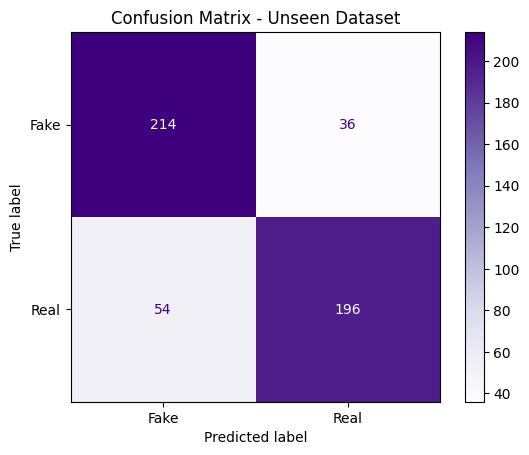

In [17]:
import os
from torchvision import datasets, transforms
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the unseen dataset
def load_unseen_data(unseen_dir, batch_size):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    unseen_data = datasets.ImageFolder(unseen_dir, transform=transform)
    unseen_loader = torch.utils.data.DataLoader(unseen_data, batch_size=batch_size, shuffle=False)
    print("Class to index mapping:", unseen_data.class_to_idx)
    return unseen_loader

# Evaluation function to calculate accuracy and confusion matrix with visualization and saving
def evaluate_on_unseen(model, unseen_loader):
    model.eval()
    unseen_acc = 0.0
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for images, labels in unseen_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.round(torch.sigmoid(outputs))
            
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            
            unseen_acc += (preds == labels.unsqueeze(1)).sum().item()
    
    unseen_accuracy = unseen_acc / len(unseen_loader.dataset)
    print(f"Unseen Dataset Accuracy: {unseen_accuracy:.2f}")

    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
    
    # Change colormap to pastel purple
    disp.plot(cmap="Purples")
    plt.title("Confusion Matrix - Unseen Dataset")
    
    # Save the plot as a .png file
    plt.savefig("confusion_matrix_pastel_purple.png", dpi=300, bbox_inches="tight")
    plt.show()

# Main function to load model and evaluate on unseen dataset
def main():
    unseen_dir = '/kaggle/input/the-fake-or-real-dataset-specto'  # Path to your unseen dataset folder
    batch_size = 16
    
    # Load unseen data
    unseen_loader = load_unseen_data(unseen_dir, batch_size)
    
    # Load the model for evaluation
    model_path = "/kaggle/input/alldata-pt-224-rgb-m/model_converted.pt"
    if os.path.exists(model_path):
        model = torch.load(model_path)
        model.to(device)
        print("Model loaded successfully from 'allData-pth--224 RGB.pth'")
        
        # Evaluate the model on the unseen dataset
        evaluate_on_unseen(model, unseen_loader)
    else:
        print(f"Model file '{model_path}' does not exist. Ensure training completed successfully.")

if __name__ == "__main__":
    main()


Model Architecture Summary:
Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            784
├─Conv2d: 1-2                            9,624
├─Conv2d: 1-3                            12,320
├─Conv2d: 1-4                            16,448
├─MaxPool2d: 1-5                         --
├─Dropout: 1-6                           --
├─Linear: 1-7                            1,278,080
├─Linear: 1-8                            129
Total params: 1,317,385
Trainable params: 1,317,385
Non-trainable params: 0
Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            784
├─Conv2d: 1-2                            9,624
├─Conv2d: 1-3                            12,320
├─Conv2d: 1-4                            16,448
├─MaxPool2d: 1-5                         --
├─Dropout: 1-6                           --
├─Linear: 1-7                            1,278,080
├─Linear: 1-8                            129
Total params: 1,317,385
Trainable params: 1,317,385
No

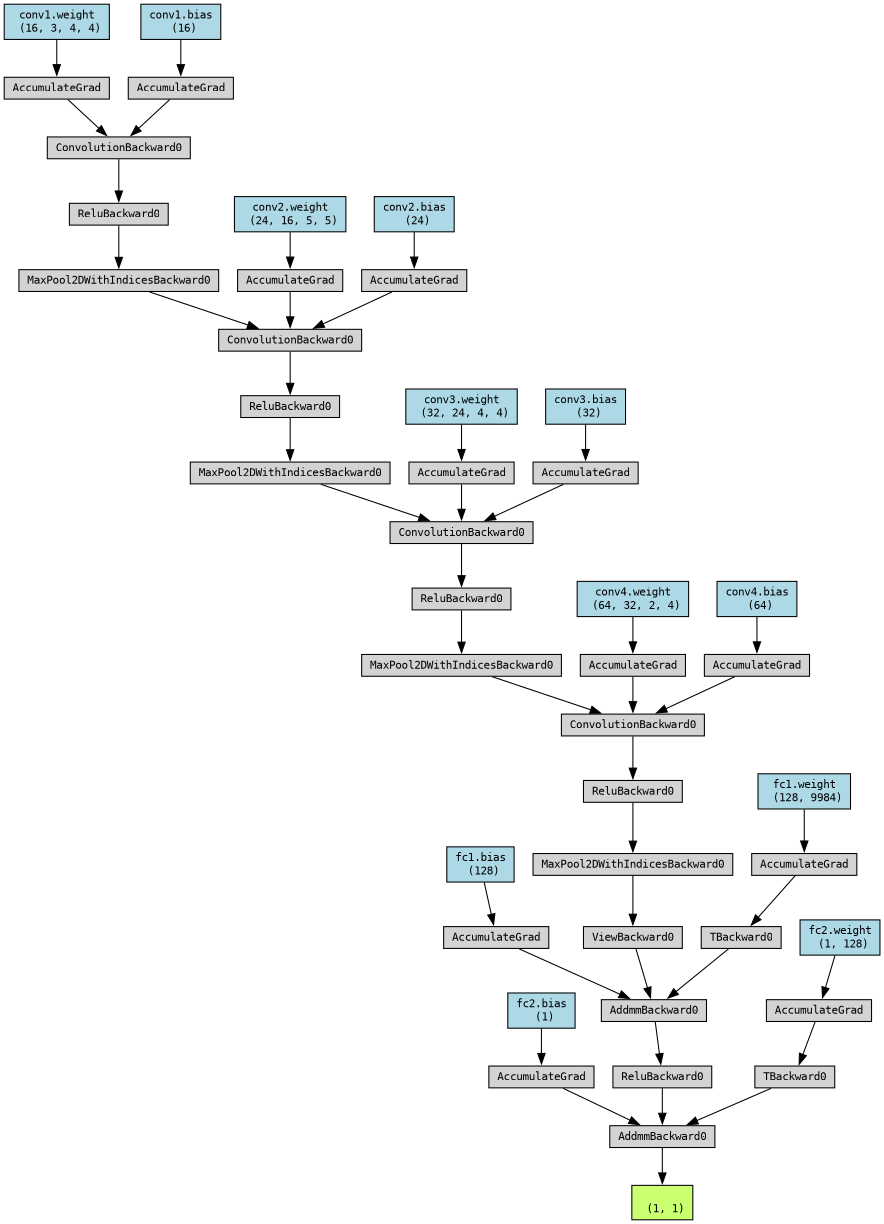

In [41]:
import torch
import torch.nn as nn
from torchsummary import summary
from torchviz import make_dot
from IPython.display import Image, display

# Define the SpectrogramCNN Model
class SpectrogramCNN(nn.Module):
    def __init__(self, in_channels, num_classes, dropout_prob=0.5):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=4, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 24, kernel_size=5, stride=1, padding=1)
        self.conv3 = nn.Conv2d(24, 32, kernel_size=4, stride=1, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(2, 4), stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc1 = nn.Linear(self._get_conv_output((in_channels, 224, 224)), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            x = torch.zeros(1, *shape)
            x = self.pool(nn.functional.relu(self.conv1(x)))
            x = self.pool(nn.functional.relu(self.conv2(x)))
            x = self.pool(nn.functional.relu(self.conv3(x)))
            x = self.pool(nn.functional.relu(self.conv4(x)))
            return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Instantiate the model
model = SpectrogramCNN(in_channels=3, num_classes=1, dropout_prob=0.5).to(device)

# Visualize with torchsummary
print("Model Architecture Summary:")
print(summary(model, input_size=(3, 224, 224)))

# Generate dummy input for torchviz visualization
dummy_input = torch.randn(1, 3, 224, 224).to(device)

# Forward pass to create graph
output = model(dummy_input)

# Visualize with torchviz
graph = make_dot(output, params=dict(model.named_parameters()))

# Render the graph to a temporary file
graph.render("temp_model_architecture", format="png")

# Display the graph inline
display(Image("temp_model_architecture.png"))


In [ ]:
from docx import Document

# Create a new Word document
doc = Document()

# Add title to the document
doc.add_heading('TAFAHAS Discussion: Model Performance Overview', level=1)

# Add first table: Random Embedding Results
doc.add_heading('Table 1: Model Performance Overview (Random Embedding)', level=2)
table1 = doc.add_table(rows=1, cols=4)
table1.style = 'Table Grid'
hdr_cells = table1.rows[0].cells
hdr_cells[0].text = 'Model'
hdr_cells[1].text = 'Test Accuracy (Dataset 1)'
hdr_cells[2].text = 'Test Accuracy (Dataset 2)'
hdr_cells[3].text = 'Notes'
data1 = [
    ["Shallow CNN", "79%", "50%", "Generalized better than others but still faced challenges on unseen data."],
    ["Pure GRU", "46%", "83%", "Higher accuracy on Dataset 2 but struggled with Dataset 1."],
    ["Pure LSTM", "50%", "50%", "Consistent but low performance across datasets."]
]
for row in data1:
    row_cells = table1.add_row().cells
    for i, cell in enumerate(row):
        row_cells[i].text = cell

# Add second table: Deterministic Embedding Results
doc.add_heading('Table 2: Model Performance Overview (Deterministic Embedding)', level=2)
table2 = doc.add_table(rows=1, cols=4)
table2.style = 'Table Grid'
hdr_cells = table2.rows[0].cells
hdr_cells[0].text = 'Model'
hdr_cells[1].text = 'Test Accuracy (Dataset 1)'
hdr_cells[2].text = 'Test Accuracy (Dataset 2)'
hdr_cells[3].text = 'Notes'
data2 = [
    ["Shallow CNN", "29.60%", "47.31%", "Struggled significantly compared to other models in deterministic setups."],
    ["Pure GRU", "43%", "29.80%", "Inconsistent results across datasets."],
    ["Pure LSTM", "53%", "43%", "Best performer for deterministic embedding but still underwhelming."]
]
for row in data2:
    row_cells = table2.add_row().cells
    for i, cell in enumerate(row):
        row_cells[i].text = cell

# Add third table: Colored Image Inputs
doc.add_heading('Table 3: Model Accuracy with Colored Image Inputs', level=2)
table3 = doc.add_table(rows=1, cols=4)
table3.style = 'Table Grid'
hdr_cells = table3.rows[0].cells
hdr_cells[0].text = 'Model'
hdr_cells[1].text = 'Input Size'
hdr_cells[2].text = 'Test Accuracy'
hdr_cells[3].text = 'Notes'
data3 = [
    ["Shallow CNN", "128", "Lower Accuracy", "Smaller image size reduced performance."],
    ["Shallow CNN", "224", "Higher Accuracy", "Larger image size improved results."]
]
for row in data3:
    row_cells = table3.add_row().cells
    for i, cell in enumerate(row):
        row_cells[i].text = cell

# Add fourth table: Final Validated Model Details
doc.add_heading('Table 4: Final Validated Shallow CNN Model', level=2)
table4 = doc.add_table(rows=1, cols=2)
table4.style = 'Table Grid'
hdr_cells = table4.rows[0].cells
hdr_cells[0].text = 'Parameter'
hdr_cells[1].text = 'Details'
data4 = [
    ["Input Size", "224"],
    ["Optimization Techniques", "Parameter tuning, data imbalance handling, overfitting prevention."],
    ["Dataset", "Complete dataset (not a subset)."]
]
for row in data4:
    row_cells = table4.add_row().cells
    for i, cell in enumerate(row):
        row_cells[i].text = cell

# Save the document
file_path = "/mnt/data/TAFAHAS_Discussion_Model_Performance.docx"
doc.save(file_path)
file_path
